<a href="https://colab.research.google.com/github/tshrsrvstv/LetsUpgradeAIML/blob/master/Cricket_Winning_Prediction_by_Akanksha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest, chi2

In [3]:
# Load the dataset
data = pd.read_excel('Sports Data.xlsx', sheet_name='Sports data for DSBA')


In [ ]:
# Display basic information about the dataset

In [60]:
data.head()

Game_number Result  Avg_team_Age Match_light_type Match_format  \
0      Game_1   Loss          18.0              Day          ODI   
1      Game_2    Win          24.0              Day          T20   
2      Game_3   Loss          24.0    Day and Night          T20   
3      Game_4    Win          24.0              Day          ODI   
4      Game_5   Loss          24.0            Night          ODI   

   Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
0              3.0                      1                  3.0   
1              3.0                      1                  4.0   
2              3.0                      1                  2.0   
3              2.0                      1                  2.0   
4              1.0                      1                  3.0   

  First_selection  Opponent  ... Max_run_scored_1over  Max_wicket_taken_1over  \
0         Bowling  Srilanka  ...                 13.0                       3   
1         Batting  Zimbabwe  ...                 12.0                       1   
2         Bowling  Zimbabwe  ...                 14.0                       4   
3         Bowling     Kenya  ...                 15.0                       4   
4         Bowling  Srilanka  ...                 12.0                       4   

  Extra_bowls_bowled  Min_run_given_1over  Min_run_scored_1over  \
0                0.0                    2                   3.0   
1                0.0                    0                   3.0   
2                0.0                    0                   3.0   
3                0.0                    2                   3.0   
4                0.0                    0                   3.0   

   Max_run_given_1over  extra_bowls_opponent  player_highest_run  \
0                  6.0                     0                54.0   
1                  6.0                     0                69.0   
2                  6.0                     0                69.0   
3                  6.0                     0                73.0   
4                  6.0                     0                80.0   

   Players_scored_zero  player_highest_wicket  
0                    3                      1  
1                    2                      1  
2                    3                      1  
3                    3                      1  
4                    3                      1  

[5 rows x 23 columns]

In [61]:
data.isna().sum()

Game_number               0
Result                    0
Avg_team_Age              0
Match_light_type          0
Match_format              0
Bowlers_in_team           0
Wicket_keeper_in_team     0
All_rounder_in_team       0
First_selection           0
Opponent                  0
Season                    0
Audience_number           0
Offshore                  0
Max_run_scored_1over      0
Max_wicket_taken_1over    0
Extra_bowls_bowled        0
Min_run_given_1over       0
Min_run_scored_1over      0
Max_run_given_1over       0
extra_bowls_opponent      0
player_highest_run        0
Players_scored_zero       0
player_highest_wicket     0
dtype: int64

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Game_number             2930 non-null   object  
 1   Result                  2930 non-null   object  
 2   Avg_team_Age            2930 non-null   float64 
 3   Match_light_type        2930 non-null   object  
 4   Match_format            2930 non-null   object  
 5   Bowlers_in_team         2930 non-null   float64 
 6   Wicket_keeper_in_team   2930 non-null   int64   
 7   All_rounder_in_team     2930 non-null   float64 
 8   First_selection         2930 non-null   object  
 9   Opponent                2930 non-null   object  
 10  Season                  2930 non-null   object  
 11  Audience_number         2930 non-null   float64 
 12  Offshore                2930 non-null   object  
 13  Max_run_scored_1over    2930 non-null   float64 
 14  Max_wicket_taken_1over  

In [63]:
data.describe(include='all').T

count unique           top    freq         mean  \
Game_number               2930   2930        Game_1       1          NaN   
Result                    2930      2           Win    2457          NaN   
Avg_team_Age            2930.0    NaN           NaN     NaN    29.267918   
Match_light_type          2930      3           Day    2093          NaN   
Match_format              2930      3           ODI    1935          NaN   
Bowlers_in_team         2930.0    NaN           NaN     NaN     2.916041   
Wicket_keeper_in_team   2930.0    NaN           NaN     NaN          1.0   
All_rounder_in_team     2930.0    NaN           NaN     NaN      2.72628   
First_selection           2930      2       Bowling    1781          NaN   
Opponent                  2930      9  South Africa     676          NaN   
Season                    2930      3         Rainy    1371          NaN   
Audience_number         2930.0    NaN           NaN     NaN  45938.46041   
Offshore                  2930      2            No    2121          NaN   
Max_run_scored_1over    2930.0    NaN           NaN     NaN    15.188396   
Max_wicket_taken_1over  2930.0    NaN           NaN     NaN     2.713993   
Extra_bowls_bowled      2930.0    NaN           NaN     NaN    11.240273   
Min_run_given_1over     2930.0    NaN           NaN     NaN      1.95256   
Min_run_scored_1over    2930.0    NaN           NaN     NaN     2.764846   
Max_run_given_1over     2930.0    NaN           NaN     NaN     8.638225   
extra_bowls_opponent    2930.0    NaN           NaN     NaN     4.229693   
player_highest_run      2930.0    NaN           NaN     NaN    65.890444   
Players_scored_zero     2930.0    4.0           3.0  1735.0          NaN   
player_highest_wicket   2930.0    5.0           1.0  1084.0          NaN   

                                 std     min      25%      50%       75%  \
Game_number                      NaN     NaN      NaN      NaN       NaN   
Result                           NaN     NaN      NaN      NaN       NaN   
Avg_team_Age                 2.23054    12.0     30.0     30.0      30.0   
Match_light_type                 NaN     NaN      NaN      NaN       NaN   
Match_format                     NaN     NaN      NaN      NaN       NaN   
Bowlers_in_team             1.009573     1.0      2.0      3.0       4.0   
Wicket_keeper_in_team            0.0     1.0      1.0      1.0       1.0   
All_rounder_in_team          1.08569     1.0      2.0      3.0       4.0   
First_selection                  NaN     NaN      NaN      NaN       NaN   
Opponent                         NaN     NaN      NaN      NaN       NaN   
Season                           NaN     NaN      NaN      NaN       NaN   
Audience_number         47962.711339  7063.0  20608.0  34349.0  55931.75   
Offshore                         NaN     NaN      NaN      NaN       NaN   
Max_run_scored_1over        3.645339    11.0     12.0     14.0      18.0   
Max_wicket_taken_1over      1.080623     1.0      2.0      3.0       4.0   
Extra_bowls_bowled          7.743208     0.0      6.0     10.0      15.0   
Min_run_given_1over         1.678332     0.0      0.0      2.0       3.0   
Min_run_scored_1over        0.702864     1.0      2.0      3.0       3.0   
Max_run_given_1over          4.98261     6.0      6.0      6.0       9.0   
extra_bowls_opponent        3.626108     0.0      2.0      3.0       7.0   
player_highest_run         20.234203    30.0     48.0     66.0      83.0   
Players_scored_zero              NaN     NaN      NaN      NaN       NaN   
player_highest_wicket            NaN     NaN      NaN      NaN       NaN   

                              max  
Game_number                   NaN  
Result                        NaN  
Avg_team_Age                 70.0  
Match_light_type              NaN  
Match_format                  NaN  
Bowlers_in_team               5.0  
Wicket_keeper_in_team         1.0  
All_rounder_in_team           4.0  
First_selection               NaN  
Opponent       

In [64]:
mode1=data["Match_light_type"].mode().values[0]
mode2=data["Match_format"].mode().values[0]
mode3=data["First_selection"].mode().values[0]
mode4=data["Opponent"].mode().values[0]
mode5=data["Season"].mode().values[0]
mode6=data['Offshore'].mode().values[0]


data["Match_light_type"]=data["Match_light_type"].replace(np.nan,mode1)
data["Match_format"]= data["Match_format"].replace(np.nan,mode2)
data["First_selection"]=data["First_selection"].replace(np.nan,mode3)
data["Opponent"]=data["Opponent"].replace(np.nan,mode4)
data["Season"]=data["Season"].replace(np.nan,mode5)
data["Offshore"]=data["Offshore"].replace(np.nan,mode6)

In [65]:
median1=data["Avg_team_Age"].median()
median2=data["Bowlers_in_team"].median()
median3=data["All_rounder_in_team"].median()
median4=data["Audience_number"].median()
median5=data["Max_run_scored_1over"].median()
median6=data["Extra_bowls_bowled"].median()
median7=data["Min_run_scored_1over"].median()
median8=data["Max_run_given_1over"].median()
median9=data["player_highest_run"].median()

data["Avg_team_Age"].replace(np.nan,median1,inplace=True)
data["Bowlers_in_team"].replace(np.nan,median2,inplace=True)
data["All_rounder_in_team"].replace(np.nan,median3,inplace=True)
data["Audience_number"].replace(np.nan,median4,inplace=True)
data["Max_run_scored_1over"].replace(np.nan,median5,inplace=True)
data["Extra_bowls_bowled"].replace(np.nan,median6,inplace=True)
data["Min_run_scored_1over"].replace(np.nan,median7,inplace=True)
data["Max_run_given_1over"].replace(np.nan,median8,inplace=True)
data["player_highest_run"].replace(np.nan,median9,inplace=True)

In [66]:
data.isna().sum()

Game_number               0
Result                    0
Avg_team_Age              0
Match_light_type          0
Match_format              0
Bowlers_in_team           0
Wicket_keeper_in_team     0
All_rounder_in_team       0
First_selection           0
Opponent                  0
Season                    0
Audience_number           0
Offshore                  0
Max_run_scored_1over      0
Max_wicket_taken_1over    0
Extra_bowls_bowled        0
Min_run_given_1over       0
Min_run_scored_1over      0
Max_run_given_1over       0
extra_bowls_opponent      0
player_highest_run        0
Players_scored_zero       0
player_highest_wicket     0
dtype: int64

In [67]:
data['Players_scored_zero'].replace(to_replace='Three', value=3, inplace=True)
data.Players_scored_zero.value_counts()

Players_scored_zero
3    1735
2     744
4     285
1     166
Name: count, dtype: int64

In [68]:
data['Players_scored_zero'].replace(to_replace='3', value=3, inplace=True)
data.Players_scored_zero.value_counts()

Players_scored_zero
3    1735
2     744
4     285
1     166
Name: count, dtype: int64

In [69]:
data['player_highest_wicket'].replace(to_replace='Three', value=3, inplace=True)
data['player_highest_wicket'].replace(to_replace='3', value=3, inplace=True)
data.player_highest_wicket.value_counts()

player_highest_wicket
1    1084
2    1063
3     434
4     211
5     138
Name: count, dtype: int64

In [70]:
data.Match_format.value_counts()

Match_format
ODI     1935
T20      870
Test     125
Name: count, dtype: int64

In [71]:
data['Match_format'].replace(to_replace='20-20', value='T20', inplace=True)
data.Match_format.value_counts()

Match_format
ODI     1935
T20      870
Test     125
Name: count, dtype: int64

In [72]:
data.First_selection.value_counts()

First_selection
Bowling    1781
Batting    1149
Name: count, dtype: int64

In [73]:
data['First_selection'].replace(to_replace='Bat', value='Batting', inplace=True)
data.First_selection.value_counts()

First_selection
Bowling    1781
Batting    1149
Name: count, dtype: int64

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Game_number             2930 non-null   object  
 1   Result                  2930 non-null   object  
 2   Avg_team_Age            2930 non-null   float64 
 3   Match_light_type        2930 non-null   object  
 4   Match_format            2930 non-null   object  
 5   Bowlers_in_team         2930 non-null   float64 
 6   Wicket_keeper_in_team   2930 non-null   int64   
 7   All_rounder_in_team     2930 non-null   float64 
 8   First_selection         2930 non-null   object  
 9   Opponent                2930 non-null   object  
 10  Season                  2930 non-null   object  
 11  Audience_number         2930 non-null   float64 
 12  Offshore                2930 non-null   object  
 13  Max_run_scored_1over    2930 non-null   float64 
 14  Max_wicket_taken_1over  

In [20]:
###Exploratory Data Analysis (EDA)

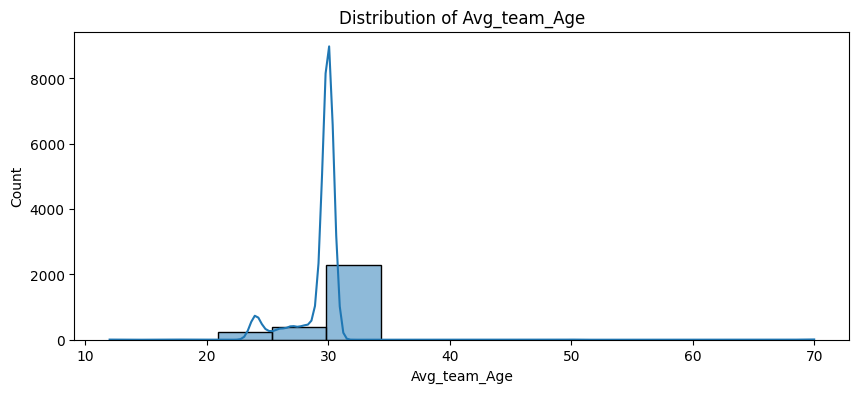

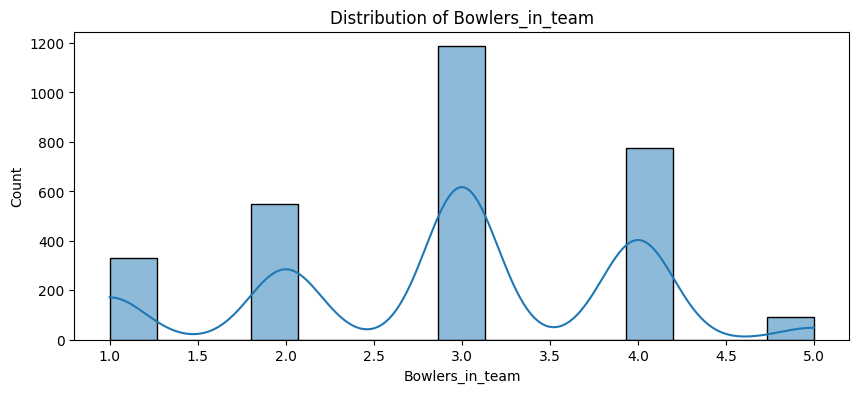

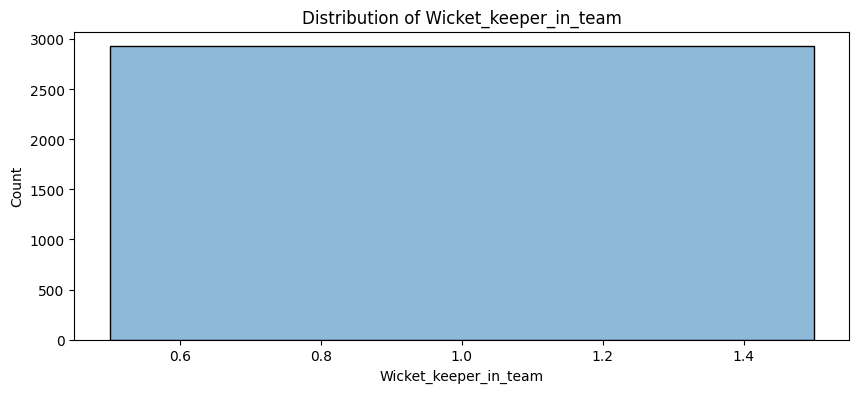

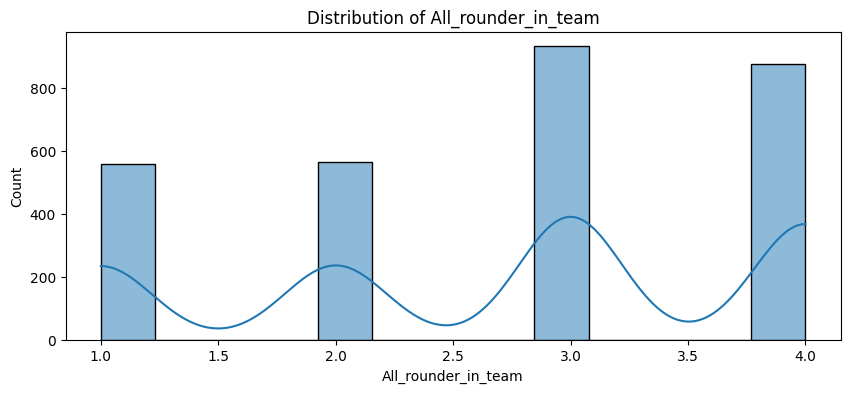

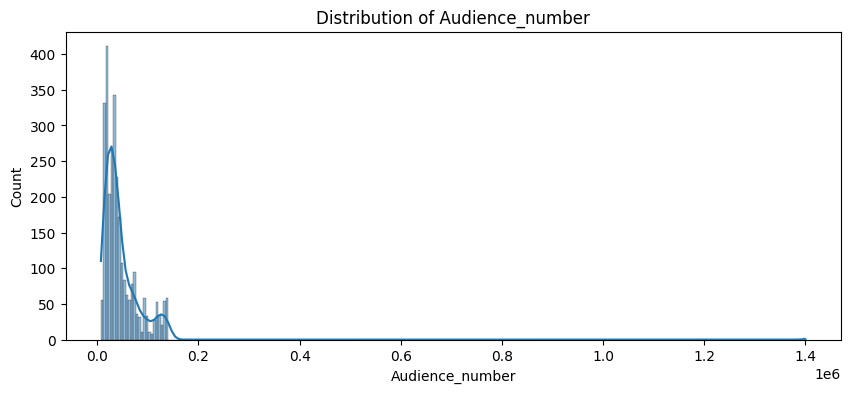

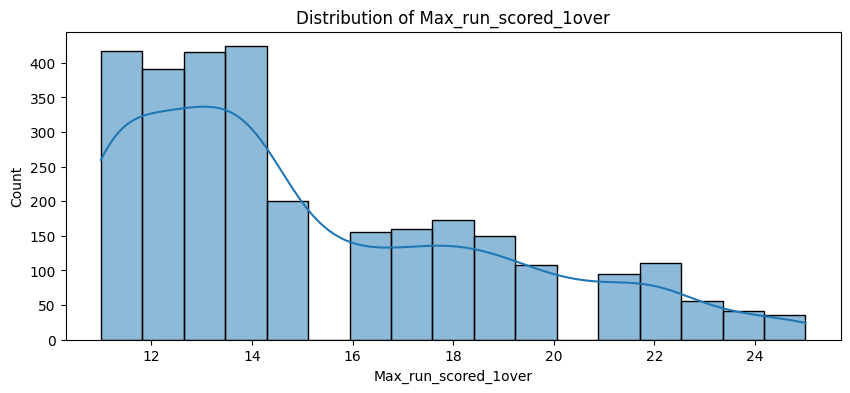

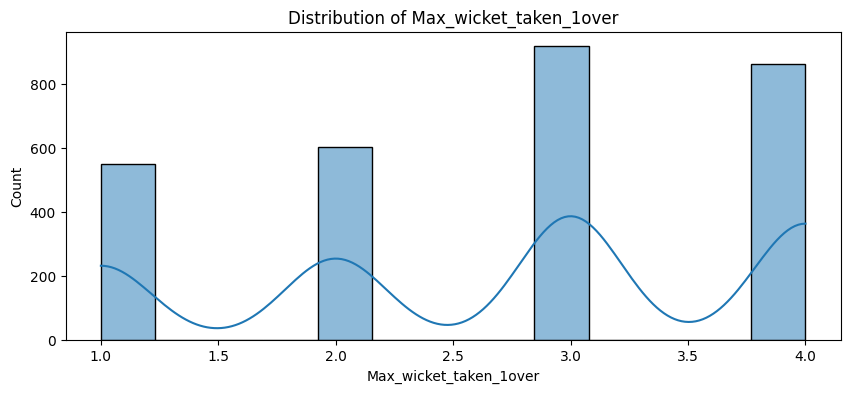

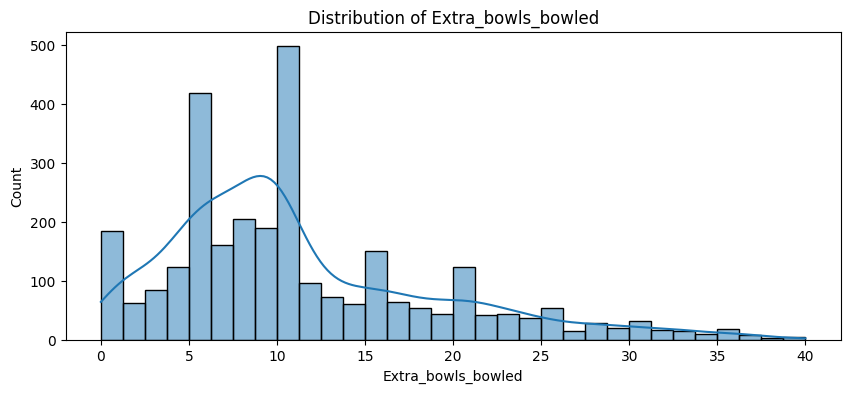

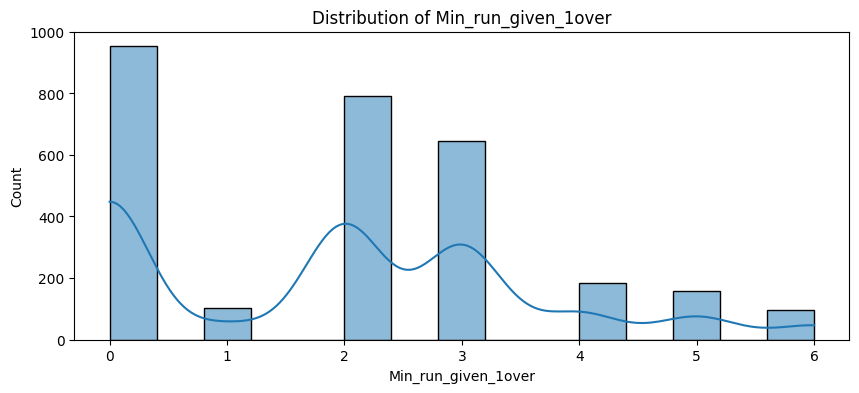

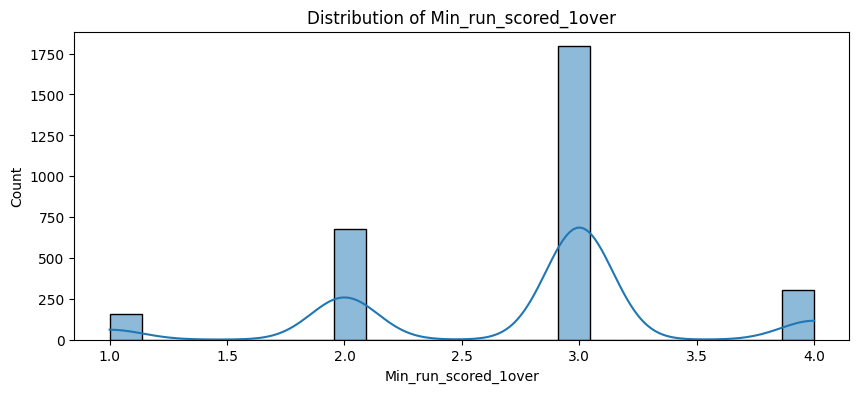

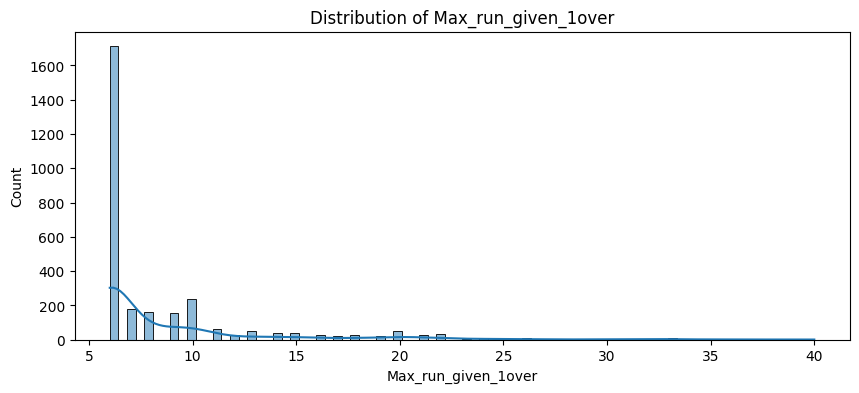

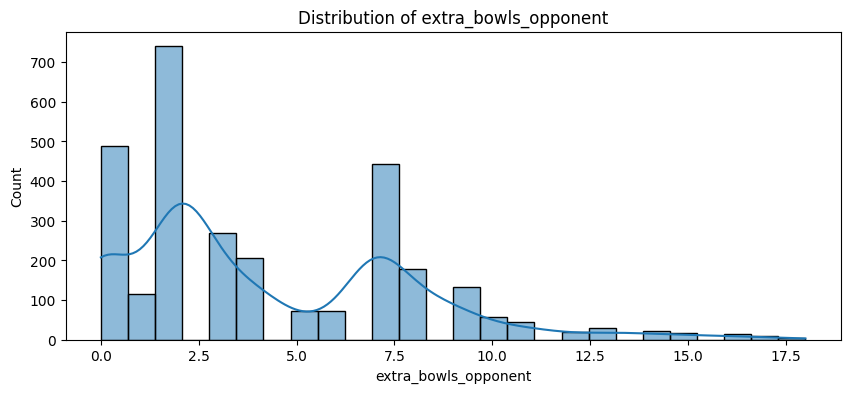

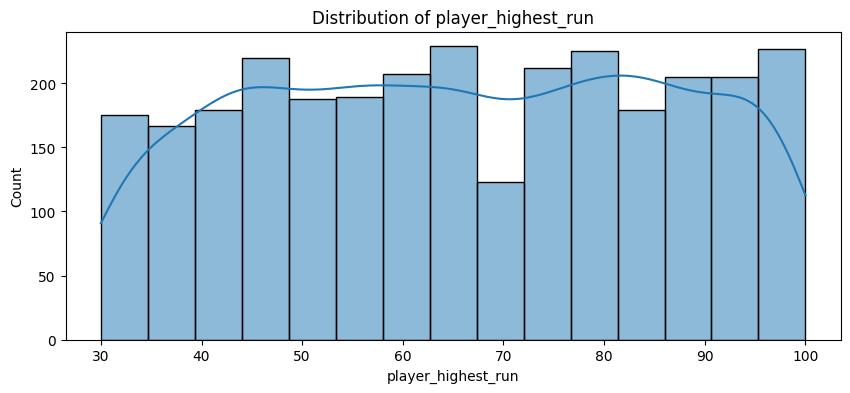

In [75]:
# Continuous Variables
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

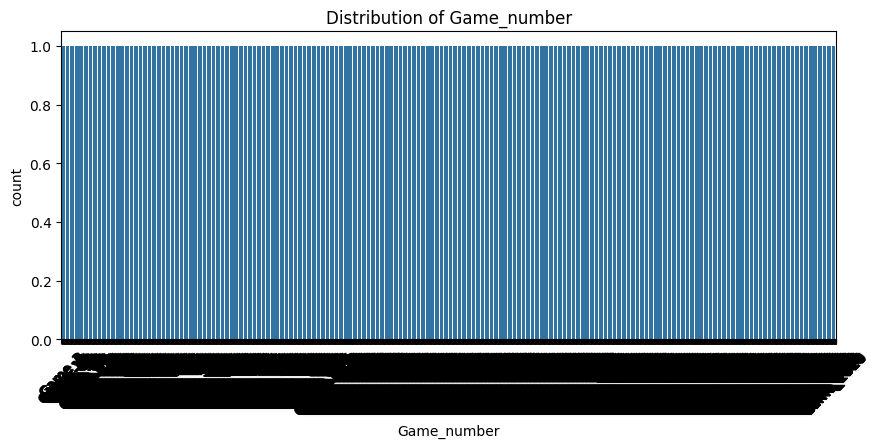

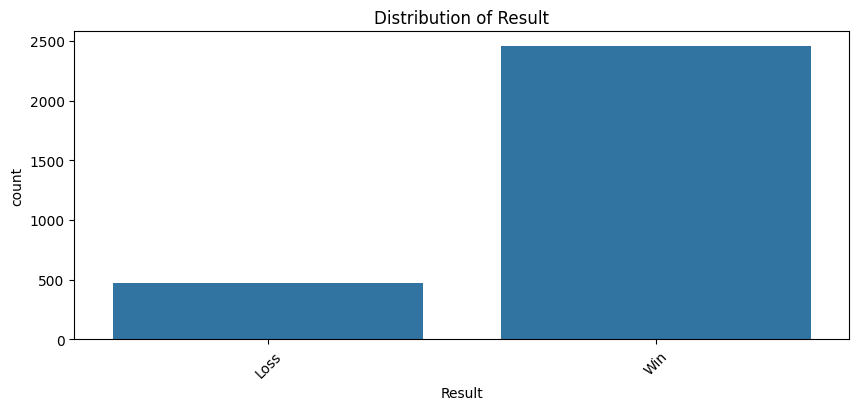

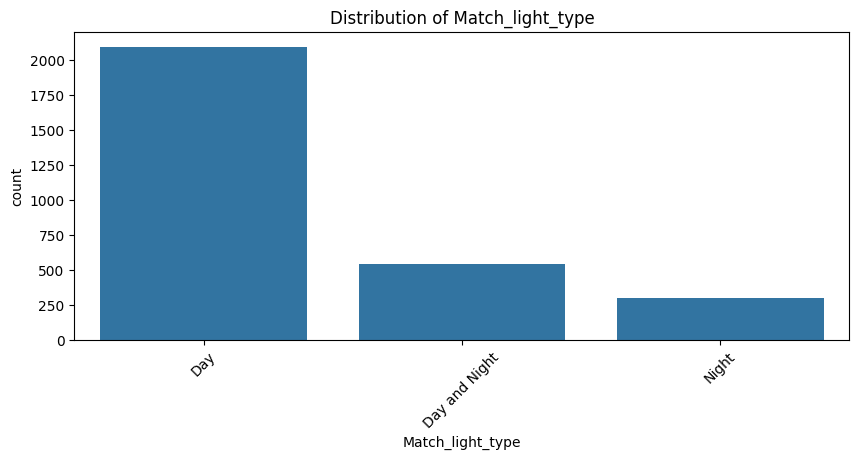

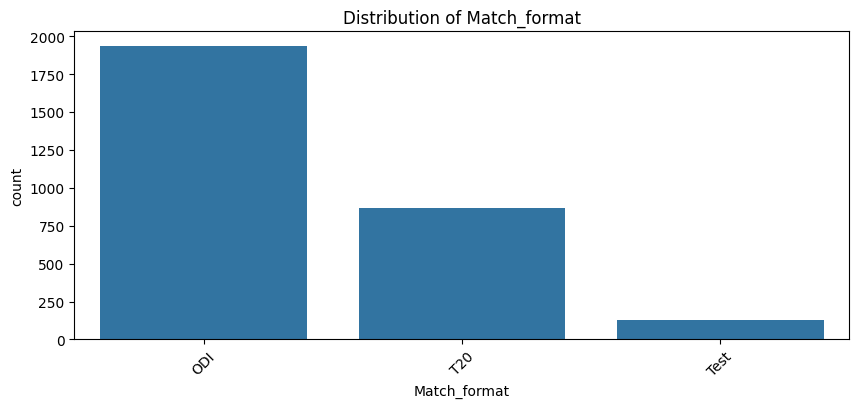

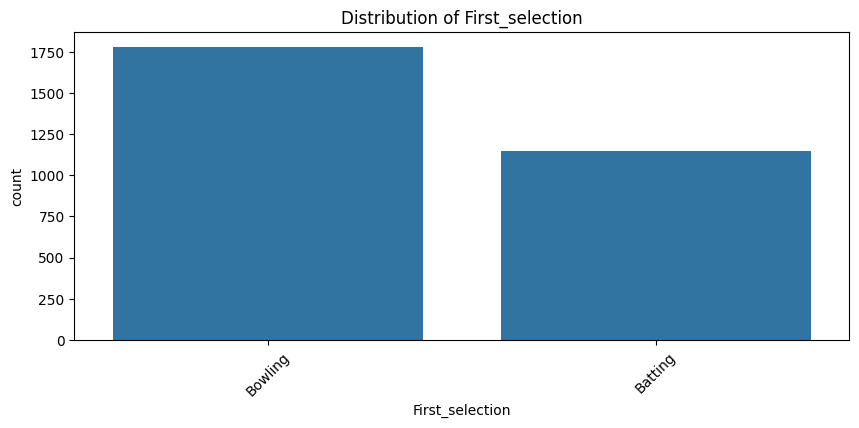

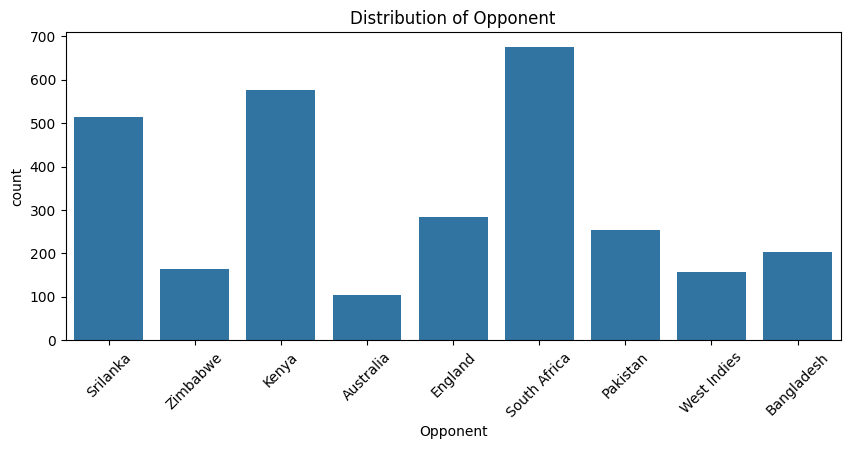

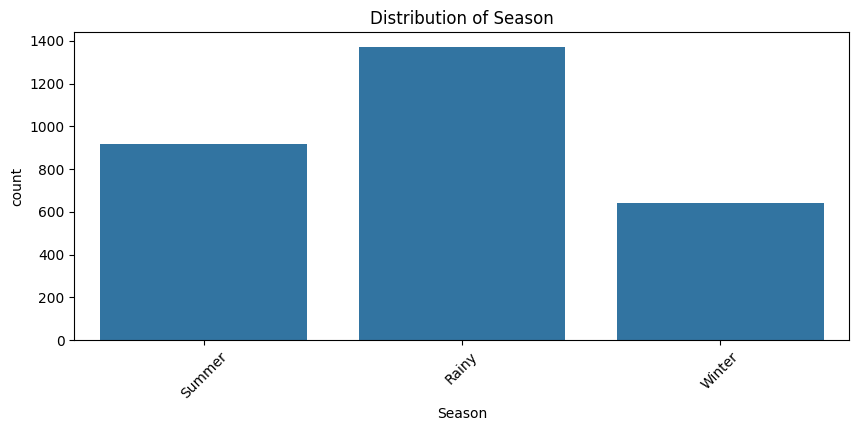

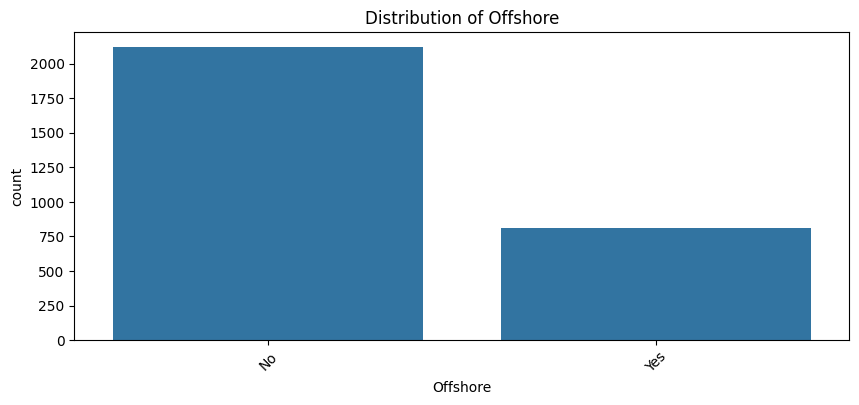

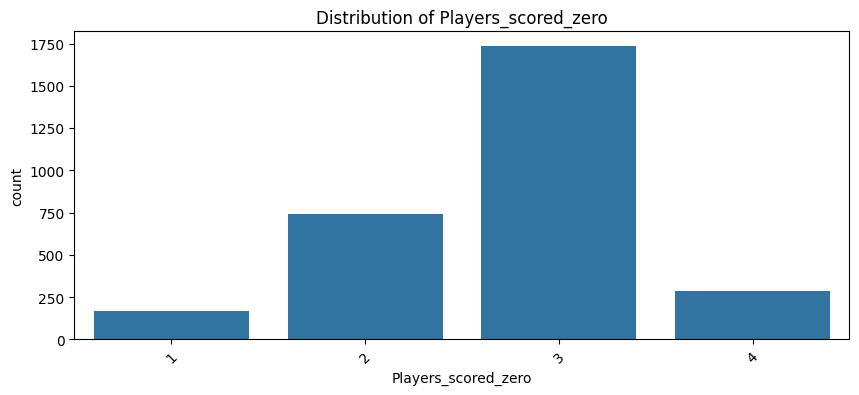

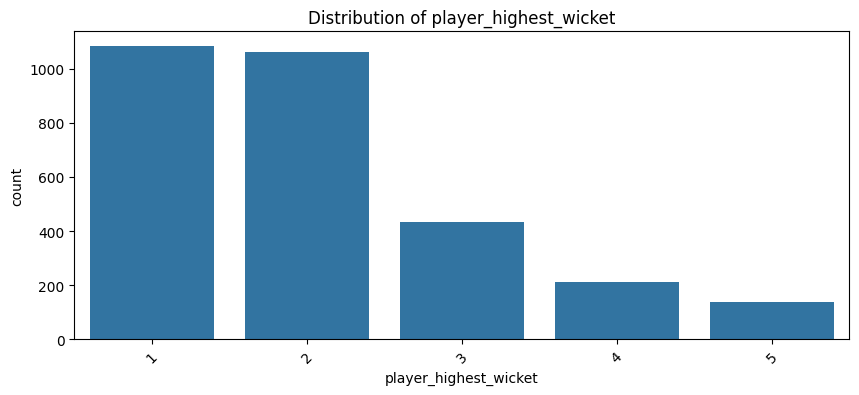

In [76]:
# Categorical Variables
for column in data.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=data)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()


In [23]:
#Bivariate Analysis for numerical variable

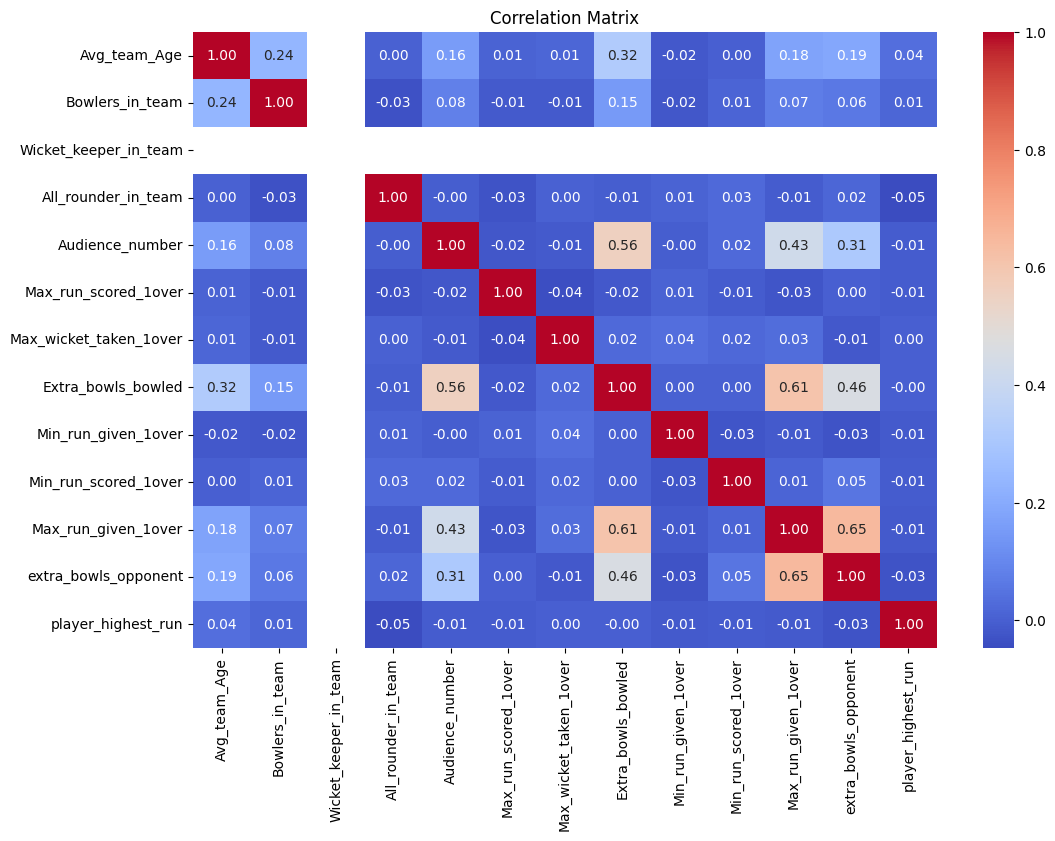

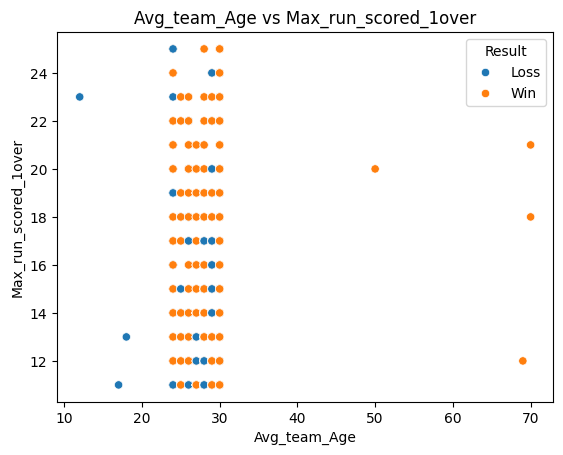

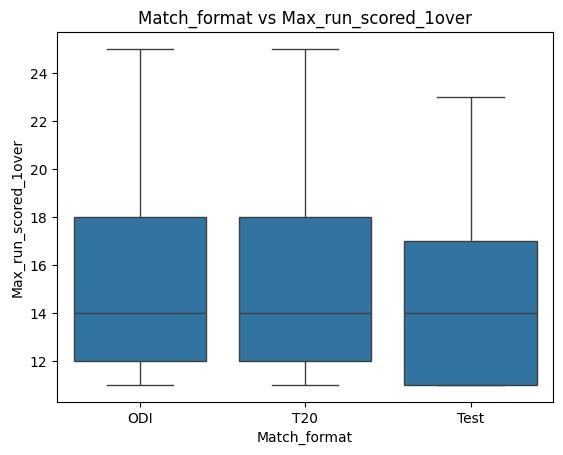

In [77]:

# Select only the numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Correlation matrix for continuous variables
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot between two continuous variables
sns.scatterplot(x='Avg_team_Age', y='Max_run_scored_1over', hue='Result', data=data)
plt.title('Avg_team_Age vs Max_run_scored_1over')
plt.show()

# Box plot for a categorical vs continuous variable
sns.boxplot(x='Match_format', y='Max_run_scored_1over', data=data)
plt.title('Match_format vs Max_run_scored_1over')
plt.show()

# Univariate Analysis

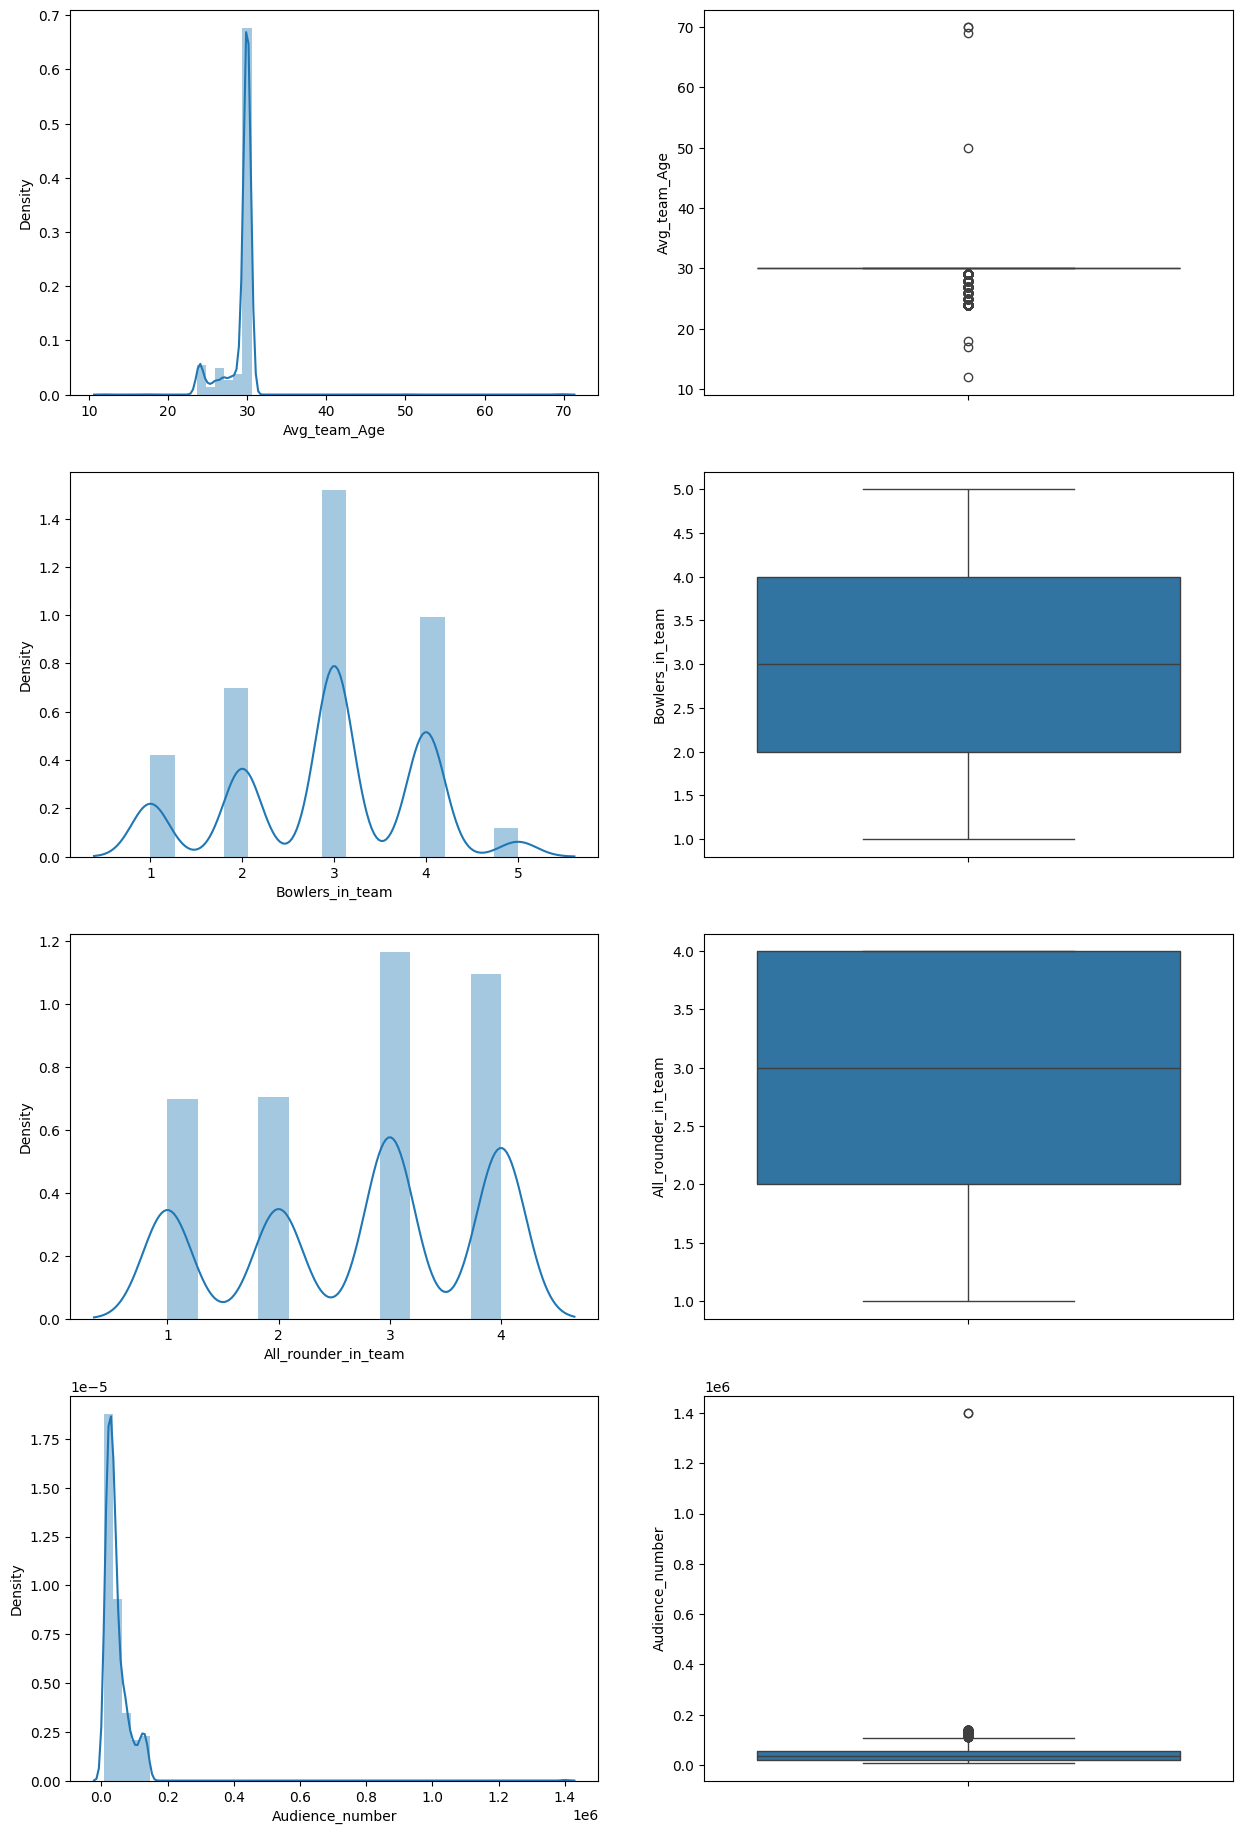

In [78]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,23)
a = sns.distplot(data['Avg_team_Age'] , ax=axes[0][0])
a = sns.boxplot(data['Avg_team_Age'] , orient = "v" , ax=axes[0][1])

a=sns.distplot(data['Bowlers_in_team'], ax=axes[1][0])
a=sns.boxplot(data['Bowlers_in_team'],orient="v", ax=axes[1][1])

a=sns.distplot(data['All_rounder_in_team'], ax=axes[2][0])
a=sns.boxplot(data['All_rounder_in_team'],orient="v", ax=axes[2][1])

a=sns.distplot(data['Audience_number'], ax=axes[3][0])
a=sns.boxplot(data['Audience_number'],orient="v", ax=axes[3][1])

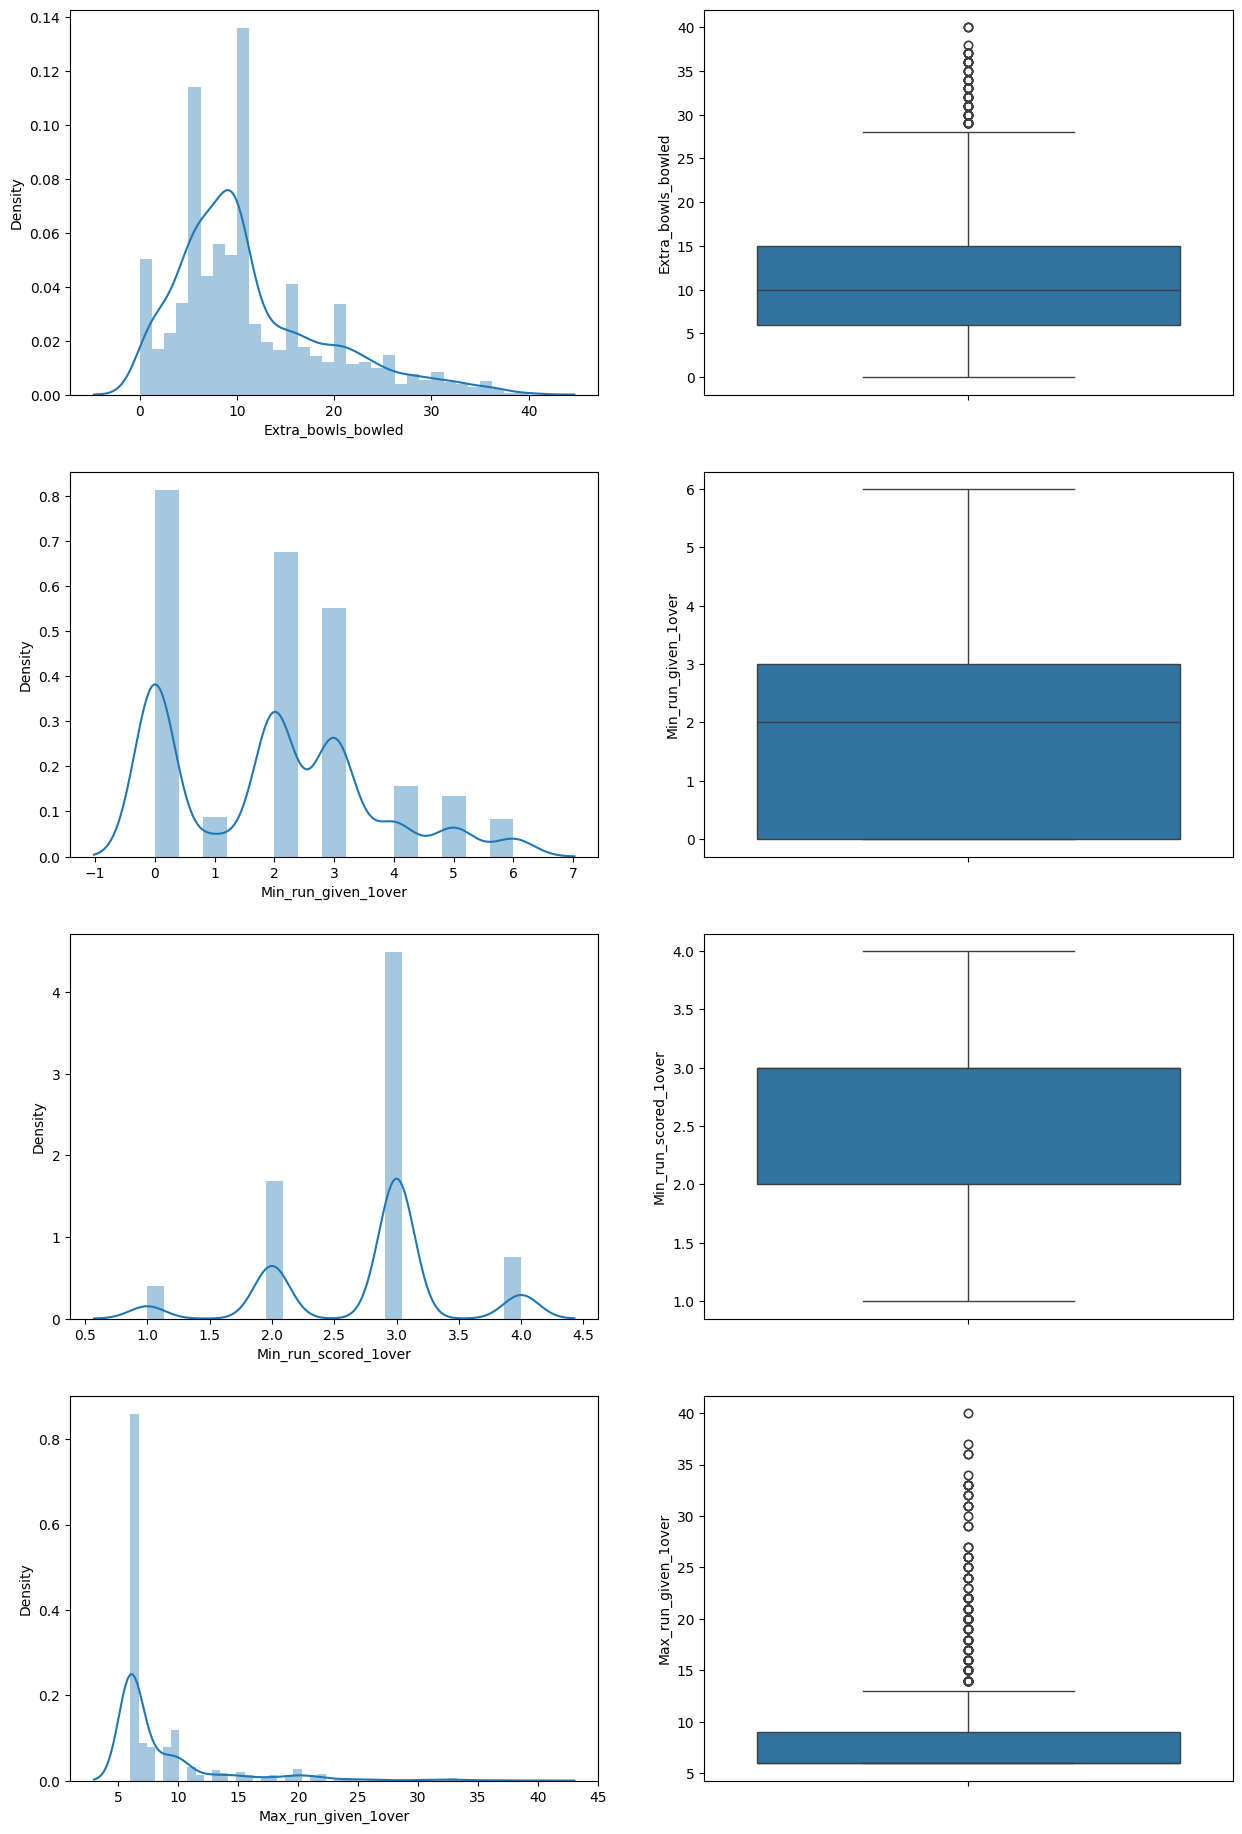

In [79]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,23)


a = sns.distplot(data['Extra_bowls_bowled'] , ax=axes[0][0])
a = sns.boxplot(data['Extra_bowls_bowled'] , orient = "v" , ax=axes[0][1])

a=sns.distplot(data['Min_run_given_1over'], ax=axes[1][0])
a=sns.boxplot(data['Min_run_given_1over'],orient="v", ax=axes[1][1])

a=sns.distplot(data['Min_run_scored_1over'], ax=axes[2][0])
a=sns.boxplot(data['Min_run_scored_1over'],orient="v", ax=axes[2][1])

a=sns.distplot(data['Max_run_given_1over'], ax=axes[3][0])
a=sns.boxplot(data['Max_run_given_1over'],orient="v", ax=axes[3][1])

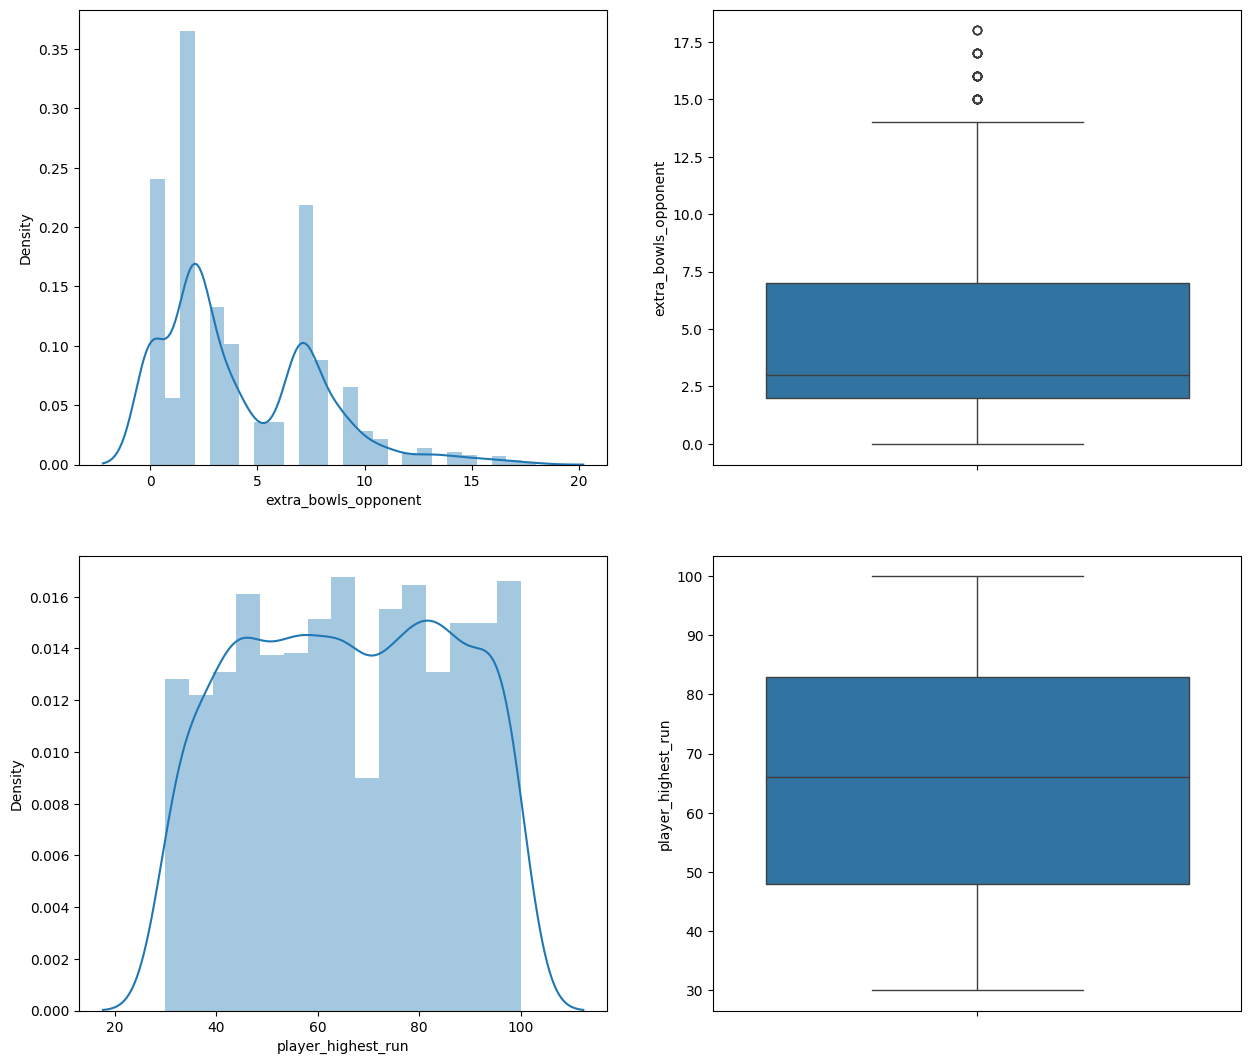

In [80]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,13)

a = sns.distplot(data['extra_bowls_opponent'] , ax=axes[0][0])
a = sns.boxplot(data['extra_bowls_opponent'] , orient = "v" , ax=axes[0][1])

a=sns.distplot(data['player_highest_run'], ax=axes[1][0])
a=sns.boxplot(data['player_highest_run'],orient="v", ax=axes[1][1])

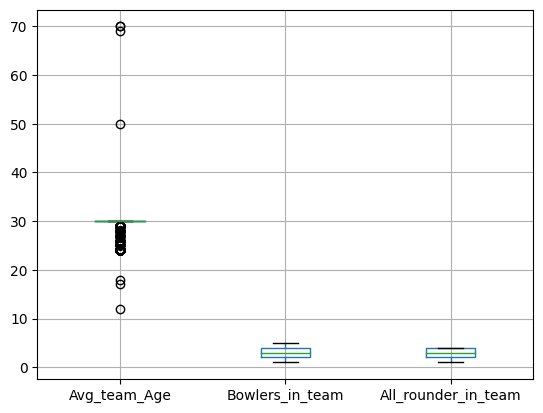

In [81]:
data.boxplot(column=['Avg_team_Age' , 'Bowlers_in_team','All_rounder_in_team'])
plt.show()

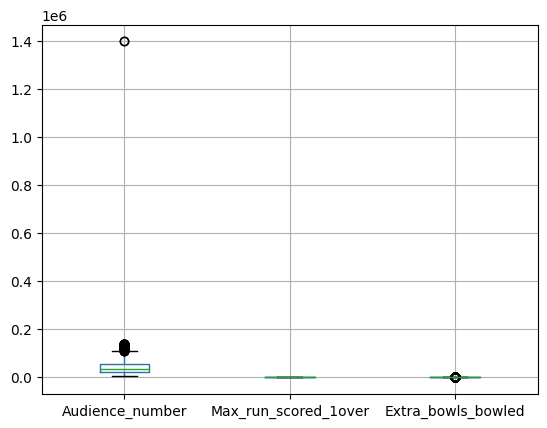

In [82]:
data.boxplot(column=['Audience_number','Max_run_scored_1over','Extra_bowls_bowled'])
plt.show()

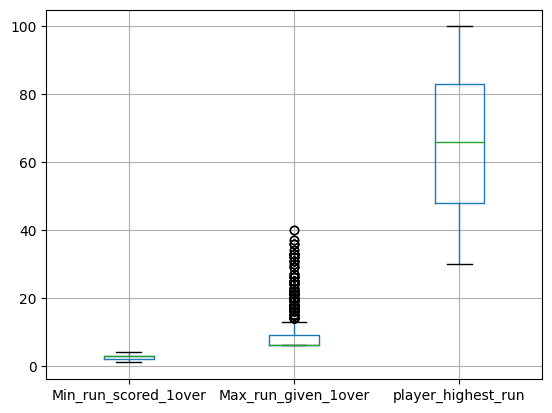

In [83]:
data.boxplot(column=['Min_run_scored_1over','Max_run_given_1over','player_highest_run'])
plt.show()

In [84]:
data["Players_scored_zero"]= pd.Categorical(data['Players_scored_zero'])
data['player_highest_wicket']=pd.Categorical(data['player_highest_wicket'])

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Game_number             2930 non-null   object  
 1   Result                  2930 non-null   object  
 2   Avg_team_Age            2930 non-null   float64 
 3   Match_light_type        2930 non-null   object  
 4   Match_format            2930 non-null   object  
 5   Bowlers_in_team         2930 non-null   float64 
 6   Wicket_keeper_in_team   2930 non-null   int64   
 7   All_rounder_in_team     2930 non-null   float64 
 8   First_selection         2930 non-null   object  
 9   Opponent                2930 non-null   object  
 10  Season                  2930 non-null   object  
 11  Audience_number         2930 non-null   float64 
 12  Offshore                2930 non-null   object  
 13  Max_run_scored_1over    2930 non-null   float64 
 14  Max_wicket_taken_1over  

# Univariate for Categorical variable

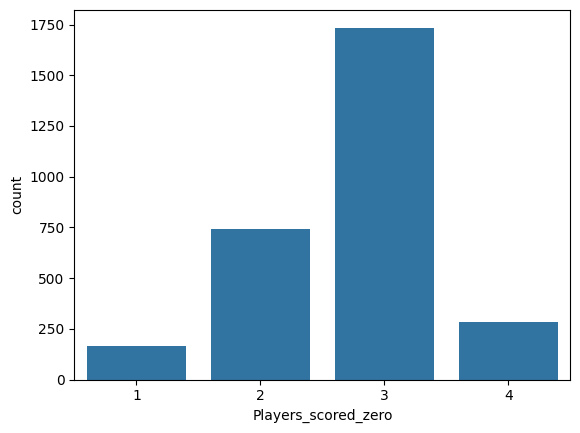

In [86]:
sns.countplot(x="Players_scored_zero", data=data);

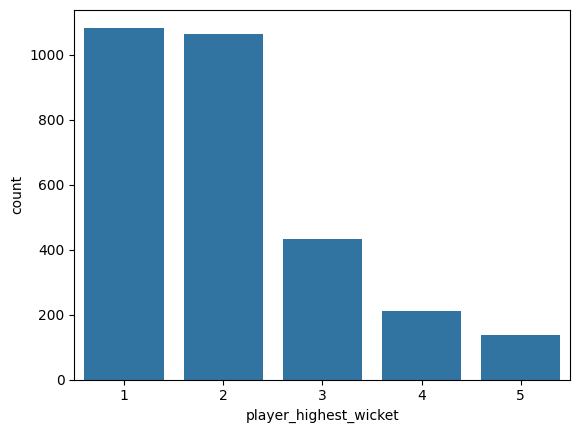

In [87]:
sns.countplot(x="player_highest_wicket", data=data);

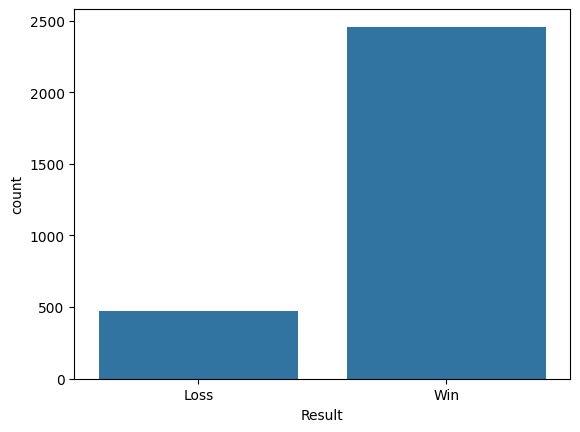

In [88]:
sns.countplot(x='Result', data=data);

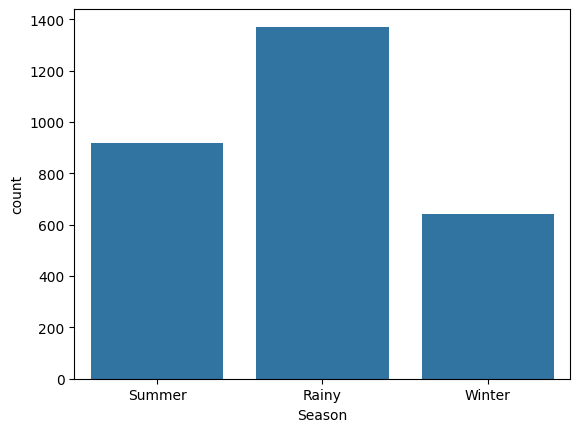

In [89]:
sns.countplot(x='Season', data=data);

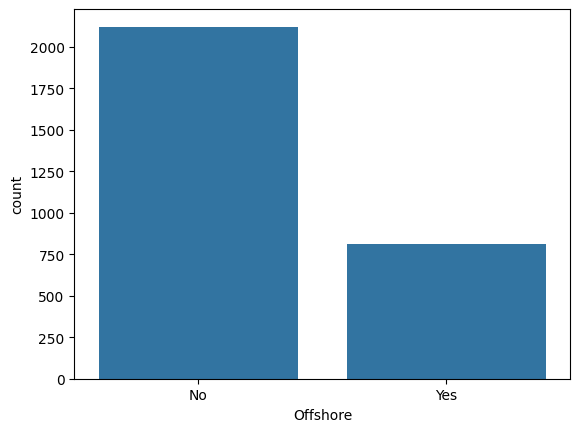

In [90]:
sns.countplot(x='Offshore', data=data);

# Bivariate Analysis for numerical variable

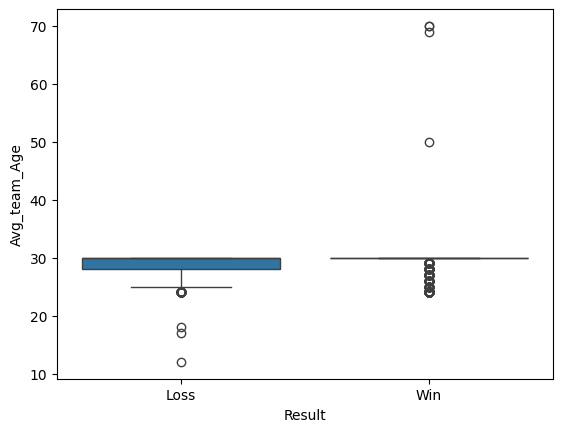

In [91]:
sns.boxplot(y='Avg_team_Age',x='Result', data=data);

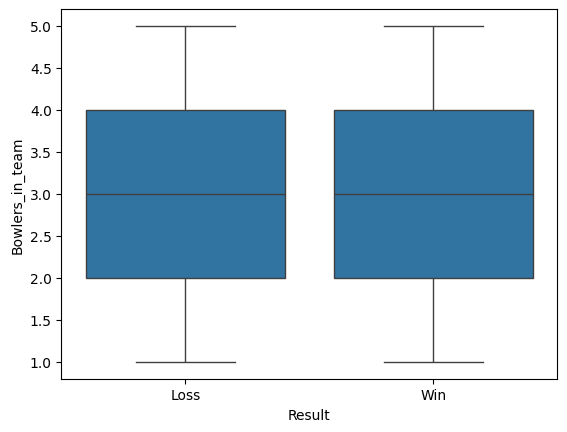

In [92]:
sns.boxplot(x='Result',y='Bowlers_in_team', data=data);

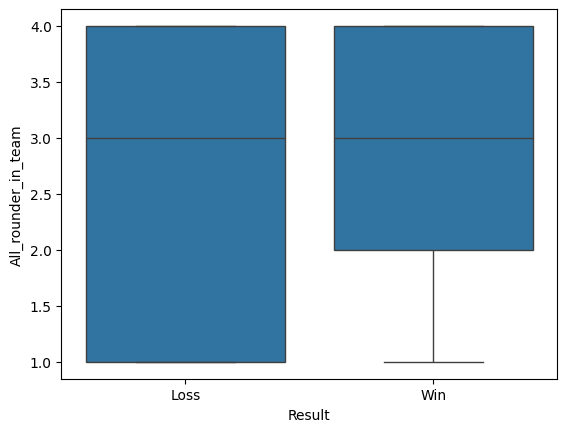

In [93]:
sns.boxplot(x='Result',y='All_rounder_in_team', data=data);

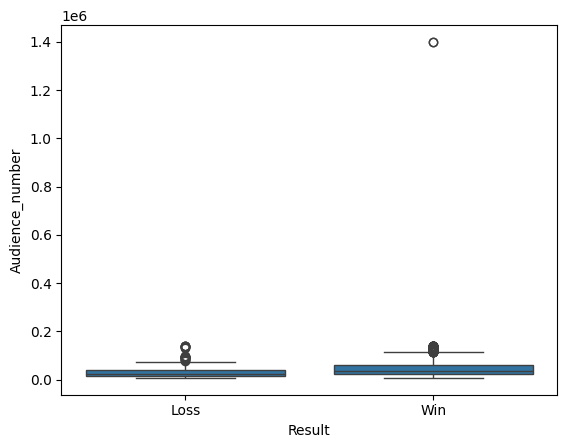

In [94]:
sns.boxplot(x='Result',y='Audience_number', data=data);

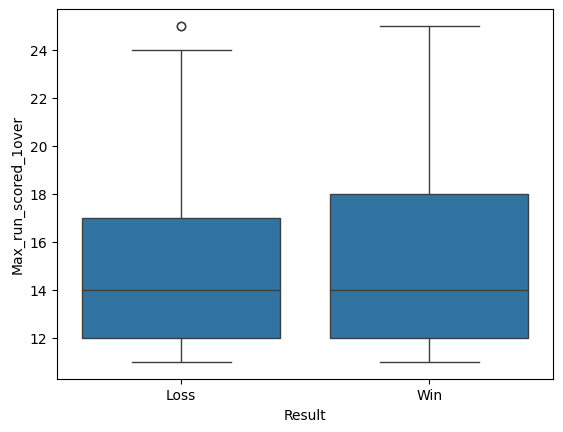

In [95]:
sns.boxplot(x='Result',y='Max_run_scored_1over', data=data);

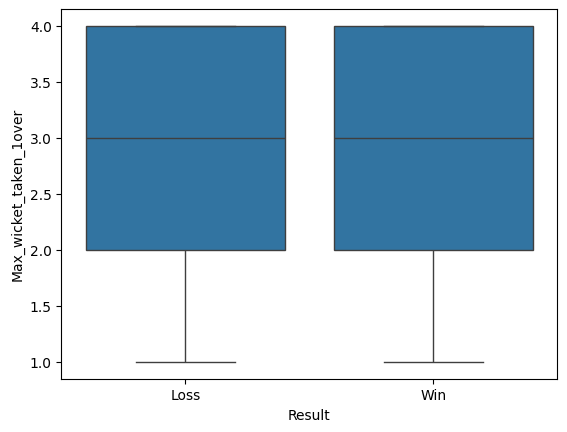

In [96]:
sns.boxplot(x='Result',y='Max_wicket_taken_1over', data=data);

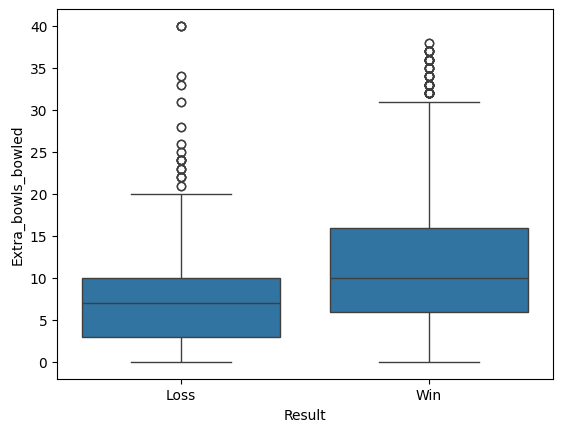

In [97]:
sns.boxplot(x='Result',y='Extra_bowls_bowled', data=data);

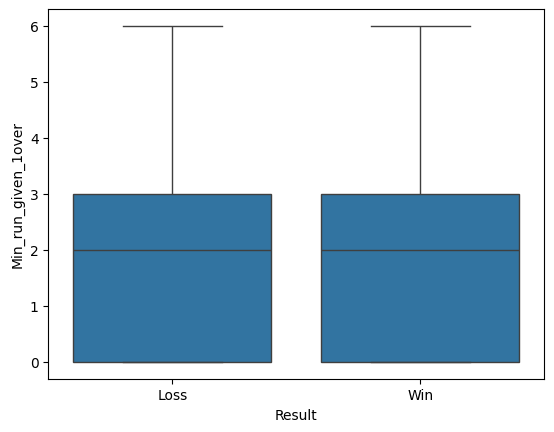

In [98]:
sns.boxplot(x='Result',y='Min_run_given_1over', data=data);

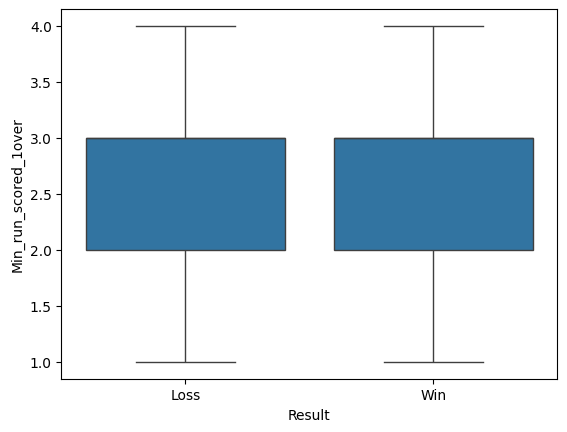

In [99]:
sns.boxplot(x='Result',y='Min_run_scored_1over', data=data);

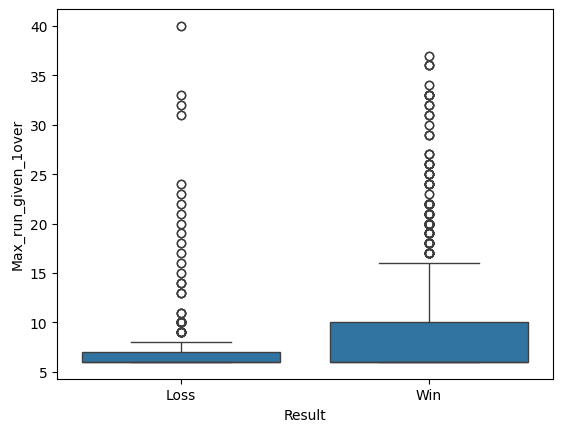

In [100]:
sns.boxplot(x='Result',y='Max_run_given_1over', data=data);

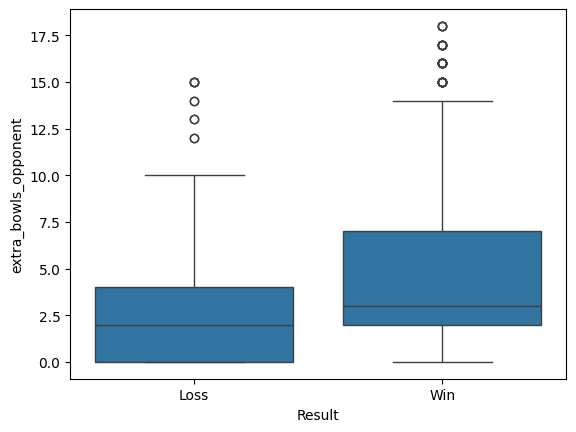

In [101]:
sns.boxplot(x='Result',y='extra_bowls_opponent', data=data);

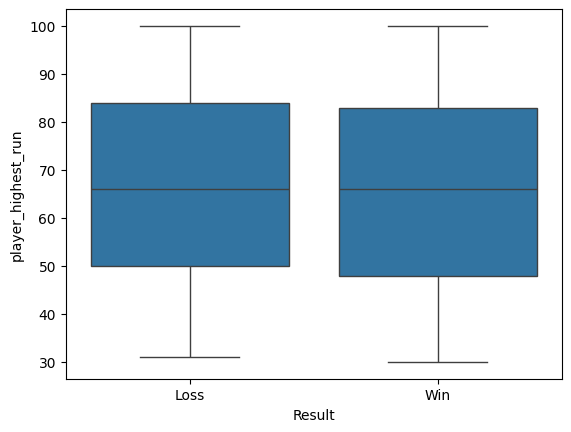

In [102]:
sns.boxplot(x='Result',y='player_highest_run', data=data);

# For Categorical Variable

In [103]:
pd.crosstab(index=data.Match_light_type,columns=data.Result)

Result            Loss   Win
Match_light_type            
Day                314  1779
Day and Night      135   406
Night               24   272

In [104]:
df=data

In [105]:
pd.crosstab(index=df.Match_format,columns=df.Result)

Result        Loss   Win
Match_format            
ODI            269  1666
T20            180   690
Test            24   101

In [106]:
pd.crosstab(index=df.First_selection,columns=df.Result)

Result           Loss   Win
First_selection            
Batting           172   977
Bowling           301  1480

In [107]:
pd.crosstab(index=df.Opponent,columns=df.Result)

Result        Loss  Win
Opponent               
Australia       24   80
Bangladesh      10  194
England         18  265
Kenya           93  483
Pakistan        17  236
South Africa   117  559
Srilanka       124  389
West Indies      4  154
Zimbabwe        66   97

In [108]:
pd.crosstab(index=df.Season,columns=df.Result)

Result  Loss   Win
Season            
Rainy    170  1201
Summer   238   680
Winter    65   576

In [109]:
pd.crosstab(index=df.Offshore,columns=df.Result)

Result    Loss   Win
Offshore            
No         227  1894
Yes        246   563

In [110]:
pd.crosstab(index=df.Players_scored_zero,columns=df.Result)

Result               Loss   Win
Players_scored_zero            
1                      56   110
2                     141   603
3                     250  1485
4                      26   259

In [111]:
pd.crosstab(index=df.player_highest_wicket,columns=df.Result)

Result                 Loss  Win
player_highest_wicket           
1                       286  798
2                       104  959
3                        63  371
4                        10  201
5                        10  128

# Multivariate Analysis

<Axes: >

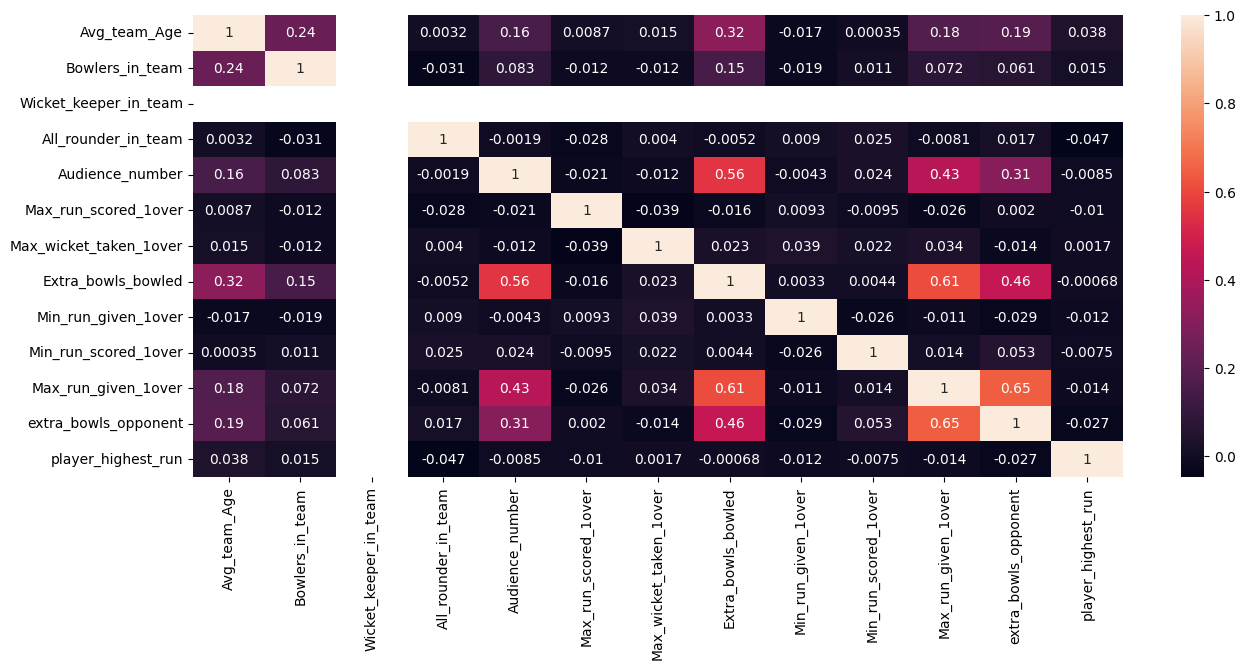

In [112]:
plt.figure(figsize=(15,6))

sns.heatmap(df.select_dtypes(include=[float, int]).corr(),annot=True)

def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lrincome,urincome=remove_outlier(df['Avg_team_Age'])
df['Avg_team_Age']=np.where(df['Avg_team_Age']>urincome,urincome,df['Avg_team_Age'])
df['Avg_team_Age']=np.where(df['Avg_team_Age']<lrincome,lrincome,df['Avg_team_Age'])

In [ ]:
# Let's remove unwanted column first

In [ ]:
# Data Processing

In [113]:
df['Result']=pd.Categorical(df['Result']).codes

In [114]:
df['Result'].value_counts()

Result
1    2457
0     473
Name: count, dtype: int64

In [115]:
df['First_selection']=pd.Categorical(df['First_selection']).codes

In [116]:
df['First_selection'].value_counts()

First_selection
1    1781
0    1149
Name: count, dtype: int64

In [117]:
df['Offshore']=pd.Categorical(df['Offshore']).codes

In [118]:
df['Offshore'].value_counts()

Offshore
0    2121
1     809
Name: count, dtype: int64

In [119]:
df.head()

Game_number  Result  Avg_team_Age Match_light_type Match_format  \
0      Game_1       0          18.0              Day          ODI   
1      Game_2       1          24.0              Day          T20   
2      Game_3       0          24.0    Day and Night          T20   
3      Game_4       1          24.0              Day          ODI   
4      Game_5       0          24.0            Night          ODI   

   Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
0              3.0                      1                  3.0   
1              3.0                      1                  4.0   
2              3.0                      1                  2.0   
3              2.0                      1                  2.0   
4              1.0                      1                  3.0   

   First_selection  Opponent  ... Max_run_scored_1over  \
0                1  Srilanka  ...                 13.0   
1                0  Zimbabwe  ...                 12.0   
2                1  Zimbabwe  ...                 14.0   
3                1     Kenya  ...                 15.0   
4                1  Srilanka  ...                 12.0   

   Max_wicket_taken_1over  Extra_bowls_bowled  Min_run_given_1over  \
0                       3                 0.0                    2   
1                       1                 0.0                    0   
2                       4                 0.0                    0   
3                       4                 0.0                    2   
4                       4                 0.0                    0   

   Min_run_scored_1over  Max_run_given_1over  extra_bowls_opponent  \
0                   3.0                  6.0                     0   
1                   3.0                  6.0                     0   
2                   3.0                  6.0                     0   
3                   3.0                  6.0                     0   
4                   3.0                  6.0                     0   

   player_highest_run  Players_scored_zero  player_highest_wicket  
0                54.0                    3                      1  
1                69.0                    2                      1  
2                69.0                    3                      1  
3                73.0                    3                      1  
4                80.0                    3                      1  

[5 rows x 23 columns]

In [120]:
df_1=df.copy()

In [121]:
df_1.head()

Game_number  Result  Avg_team_Age Match_light_type Match_format  \
0      Game_1       0          18.0              Day          ODI   
1      Game_2       1          24.0              Day          T20   
2      Game_3       0          24.0    Day and Night          T20   
3      Game_4       1          24.0              Day          ODI   
4      Game_5       0          24.0            Night          ODI   

   Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
0              3.0                      1                  3.0   
1              3.0                      1                  4.0   
2              3.0                      1                  2.0   
3              2.0                      1                  2.0   
4              1.0                      1                  3.0   

   First_selection  Opponent  ... Max_run_scored_1over  \
0                1  Srilanka  ...                 13.0   
1                0  Zimbabwe  ...                 12.0   
2                1  Zimbabwe  ...                 14.0   
3                1     Kenya  ...                 15.0   
4                1  Srilanka  ...                 12.0   

   Max_wicket_taken_1over  Extra_bowls_bowled  Min_run_given_1over  \
0                       3                 0.0                    2   
1                       1                 0.0                    0   
2                       4                 0.0                    0   
3                       4                 0.0                    2   
4                       4                 0.0                    0   

   Min_run_scored_1over  Max_run_given_1over  extra_bowls_opponent  \
0                   3.0                  6.0                     0   
1                   3.0                  6.0                     0   
2                   3.0                  6.0                     0   
3                   3.0                  6.0                     0   
4                   3.0                  6.0                     0   

   player_highest_run  Players_scored_zero  player_highest_wicket  
0                54.0                    3                      1  
1                69.0                    2                      1  
2                69.0                    3                      1  
3                73.0                    3                      1  
4                80.0                    3                      1  

[5 rows x 23 columns]

In [122]:
df_1=pd.get_dummies(df_1,columns=['Match_light_type','Match_format','Opponent','Season','Players_scored_zero','player_highest_wicket','Game_number'],drop_first=True)

In [123]:
a=df_1.pop('Result')
b=df_1

In [ ]:
#Model Development

In [124]:
x_train1,x_test1,y_train1,y_test1= train_test_split(b, a, test_size=0.3, random_state=1)

In [125]:
select_feature = SelectKBest(chi2, k='all').fit(x_train1, y_train1)

In [126]:
selected_features_df = pd.DataFrame({'Feature':list(x_train1.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

Feature        Scores
5          Audience_number  1.539290e+06
9       Extra_bowls_bowled  3.373231e+02
13    extra_bowls_opponent  1.676524e+02
6                 Offshore  8.085816e+01
26       Opponent_Zimbabwe  5.582450e+01
...                    ...           ...
2952  Game_number_Game_988           NaN
2954   Game_number_Game_99           NaN
2959  Game_number_Game_994           NaN
2960  Game_number_Game_995           NaN
2962  Game_number_Game_997           NaN

[2965 rows x 2 columns]

In [127]:
x_train_chi = select_feature.transform(x_train1)
x_test_chi = select_feature.transform(x_test1)

In [128]:
model = LogisticRegression()

In [129]:
lr_chi_model = model.fit(x_train_chi,y_train1)

In [130]:
#Re-Modeling and Strategy Formulation

In [131]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix

In [132]:
def generate_accuracy_and_heatmap(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")

    return

In [133]:
generate_accuracy_and_heatmap(lr_chi_model, x_test_chi, y_test1)

Accuracy is:  0.8361774744027304
F1 score is:  0.9107806691449815




In [134]:
# Lets drop the Game number as the chi square score is nt significant

In [135]:
df_2=df.copy()

In [136]:
df_2 = df_2.drop(columns=['Game_number'], axis=1)
df_2.head()

Result  Avg_team_Age Match_light_type Match_format  Bowlers_in_team  \
0       0          18.0              Day          ODI              3.0   
1       1          24.0              Day          T20              3.0   
2       0          24.0    Day and Night          T20              3.0   
3       1          24.0              Day          ODI              2.0   
4       0          24.0            Night          ODI              1.0   

   Wicket_keeper_in_team  All_rounder_in_team  First_selection  Opponent  \
0                      1                  3.0                1  Srilanka   
1                      1                  4.0                0  Zimbabwe   
2                      1                  2.0                1  Zimbabwe   
3                      1                  2.0                1     Kenya   
4                      1                  3.0                1  Srilanka   

   Season  ...  Max_run_scored_1over  Max_wicket_taken_1over  \
0  Summer  ...                  13.0                       3   
1  Summer  ...                  12.0                       1   
2   Rainy  ...                  14.0                       4   
3  Summer  ...                  15.0                       4   
4  Summer  ...                  12.0                       4   

   Extra_bowls_bowled  Min_run_given_1over  Min_run_scored_1over  \
0                 0.0                    2                   3.0   
1                 0.0                    0                   3.0   
2                 0.0                    0                   3.0   
3                 0.0                    2                   3.0   
4                 0.0                    0                   3.0   

   Max_run_given_1over  extra_bowls_opponent  player_highest_run  \
0                  6.0                     0                54.0   
1                  6.0                     0                69.0   
2                  6.0                     0                69.0   
3                  6.0                     0                73.0   
4                  6.0                     0                80.0   

   Players_scored_zero  player_highest_wicket  
0                    3                      1  
1                    2                      1  
2                    3                      1  
3                    3                      1  
4                    3                      1  

[5 rows x 22 columns]

In [137]:
df_2=pd.get_dummies(df_2,columns=['Match_light_type','Match_format','Opponent','Season','Players_scored_zero','player_highest_wicket'],drop_first=True)

In [138]:
p=df_2.pop('Result')
s=df_2

In [139]:
x_train2,x_test2,y_train2,y_test2= train_test_split(s, p, test_size=0.3, random_state=1)

In [140]:
select_feature = SelectKBest(chi2, k='all').fit(x_train2, y_train2)

In [141]:
selected_features_df1 = pd.DataFrame({'Feature':list(x_train2.columns),
                                     'Scores':select_feature.scores_})
selected_features_df1.sort_values(by='Scores', ascending=False)

Feature        Scores
5                  Audience_number  1.539290e+06
9               Extra_bowls_bowled  3.373231e+02
13            extra_bowls_opponent  1.676524e+02
6                         Offshore  8.085816e+01
26               Opponent_Zimbabwe  5.582450e+01
27                   Season_Summer  4.525627e+01
12             Max_run_given_1over  3.913104e+01
10             Min_run_given_1over  3.077176e+01
15  Match_light_type_Day and Night  2.109785e+01
19             Opponent_Bangladesh  1.890085e+01
32         player_highest_wicket_2  1.749915e+01
25            Opponent_West Indies  1.614492e+01
24               Opponent_Srilanka  1.599199e+01
20                Opponent_England  1.482618e+01
34         player_highest_wicket_4  1.319061e+01
17                Match_format_T20  1.012452e+01
35         player_highest_wicket_5  1.009267e+01
28                   Season_Winter  9.650935e+00
16          Match_light_type_Night  8.998566e+00
31           Players_scored_zero_4  8.890099e+00
3              All_rounder_in_team  7.763370e+00
22               Opponent_Pakistan  7.249808e+00
0                     Avg_team_Age  6.308481e+00
18               Match_format_Test  2.171684e+00
8           Max_wicket_taken_1over  2.142275e+00
30           Players_scored_zero_3  1.500470e+00
11            Min_run_scored_1over  1.345619e+00
23           Opponent_South Africa  1.116496e+00
29           Players_scored_zero_2  1.017460e+00
4                  First_selection  9.019972e-01
1                  Bowlers_in_team  8.729197e-01
21                  Opponent_Kenya  5.556134e-01
14              player_highest_run  4.414944e-01
33         player_highest_wicket_3  1.744586e-01
7             Max_run_scored_1over  7.549787e-02
2            Wicket_keeper_in_team  0.000000e+00

In [142]:
# Here we can see that the chi square score for wicket keeper variable is zero
# so we will be eliminating the variable to build our model

In [143]:
df = df.drop(columns=['Game_number','Wicket_keeper_in_team'], axis=1)
df.head()

Result  Avg_team_Age Match_light_type Match_format  Bowlers_in_team  \
0       0          18.0              Day          ODI              3.0   
1       1          24.0              Day          T20              3.0   
2       0          24.0    Day and Night          T20              3.0   
3       1          24.0              Day          ODI              2.0   
4       0          24.0            Night          ODI              1.0   

   All_rounder_in_team  First_selection  Opponent  Season  Audience_number  \
0                  3.0                1  Srilanka  Summer           9940.0   
1                  4.0                0  Zimbabwe  Summer           8400.0   
2                  2.0                1  Zimbabwe   Rainy          13146.0   
3                  2.0                1     Kenya  Summer           7357.0   
4                  3.0                1  Srilanka  Summer          13328.0   

   ...  Max_run_scored_1over  Max_wicket_taken_1over  Extra_bowls_bowled  \
0  ...                  13.0                       3                 0.0   
1  ...                  12.0                       1                 0.0   
2  ...                  14.0                       4                 0.0   
3  ...                  15.0                       4                 0.0   
4  ...                  12.0                       4                 0.0   

   Min_run_given_1over  Min_run_scored_1over  Max_run_given_1over  \
0                    2                   3.0                  6.0   
1                    0                   3.0                  6.0   
2                    0                   3.0                  6.0   
3                    2                   3.0                  6.0   
4                    0                   3.0                  6.0   

   extra_bowls_opponent  player_highest_run  Players_scored_zero  \
0                     0                54.0                    3   
1                     0                69.0                    2   
2                     0                69.0                    3   
3                     0                73.0                    3   
4                     0                80.0                    3   

  player_highest_wicket  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 21 columns]

In [144]:
df=pd.get_dummies(df,columns=['Match_light_type','Match_format','Opponent','Season','Players_scored_zero','player_highest_wicket'],drop_first=True)

In [145]:
df2=df.copy()

In [146]:
# First we have to spli the data
y=df.pop('Result')
x=df

In [147]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.3, random_state=1)

In [148]:
print("Training set for independent variable is",x_train.shape)
print("Test set for independent variable is",x_test.shape)
print("Training set for dependent variable is",y_train.shape)
print("Test set for dependent variable is",y_test.shape)

Training set for independent variable is (2051, 35)
Test set for independent variable is (879, 35)
Training set for dependent variable is (2051,)
Test set for dependent variable is (879,)


In [149]:
#Project-2

In [150]:
#1.Model Building and Interpretation

In [151]:
#a. Build Various Models
#For this task, we can build different types of models depending on the objectives:

# Logistic Regression

In [152]:
# Let's first build the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [153]:
from sklearn.metrics import classification_report

pred_train_lr = model.predict(x_train)
print(classification_report(y_train, pred_train_lr))

              precision    recall  f1-score   support

           0       0.93      0.04      0.08       329
           1       0.84      1.00      0.92      1722

    accuracy                           0.85      2051
   macro avg       0.89      0.52      0.50      2051
weighted avg       0.86      0.85      0.78      2051



AUC: 0.711


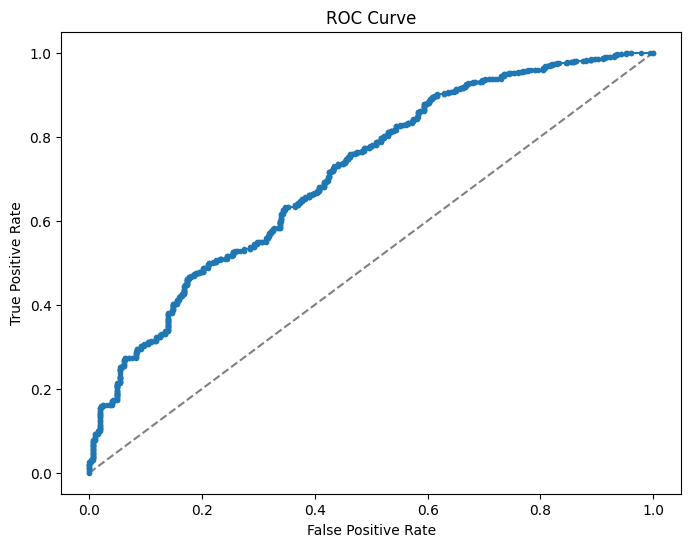

In [154]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Convert categorical labels to binary
label_encoder = LabelEncoder()
y_train_binary = label_encoder.fit_transform(y_train)

# Predict probabilities
probs_lr = model.predict_proba(x_train)
# Keep probabilities for the positive outcome only
probs_lr = probs_lr[:, 1]

# Calculate AUC
lr_train_auc = roc_auc_score(y_train_binary, probs_lr)
print('AUC: %.3f' % lr_train_auc)

# Calculate ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_binary, probs_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.plot(train_fpr, train_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [155]:
confusion_matrix(y_train,pred_train_lr)

array([[  13,  316],
       [   1, 1721]])

In [156]:
# lets check for test data
pred_test_lr = model.predict(x_test)
print(classification_report(y_test, pred_test_lr))

              precision    recall  f1-score   support

           0       1.00      0.01      0.03       144
           1       0.84      1.00      0.91       735

    accuracy                           0.84       879
   macro avg       0.92      0.51      0.47       879
weighted avg       0.86      0.84      0.77       879



AUC: 0.722


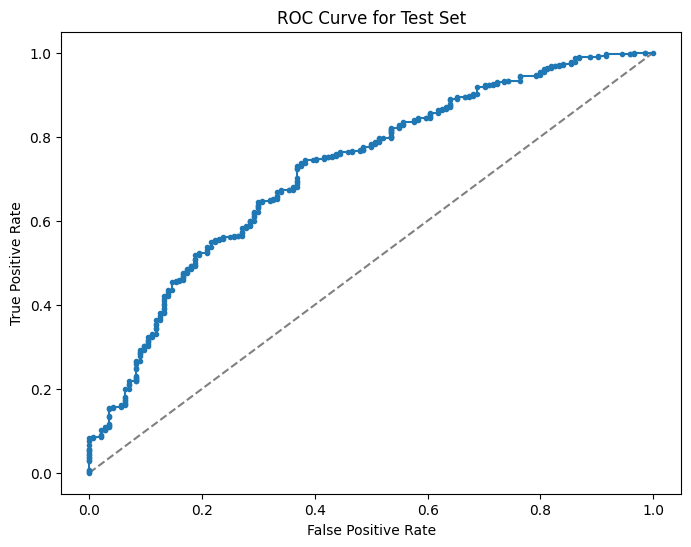

In [157]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Convert categorical labels to binary for test set
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Predict probabilities
probs_test_lr = model.predict_proba(x_test)
# Keep probabilities for the positive outcome only
probs_test_lr = probs_test_lr[:, 1]

# Calculate AUC
lr_test_auc = roc_auc_score(y_test_binary, probs_test_lr)
print('AUC: %.3f' % lr_test_auc)

# Calculate ROC curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_binary, probs_test_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.plot(test_fpr, test_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.show()


In [158]:
confusion_matrix(y_test,pred_test_lr)

array([[  2, 142],
       [  0, 735]])

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
grid= {'solver':['liblinear', 'newton-cg'],
      'penalty':['l1','l2','none'],'tol':[0.0001,0.000001],
      }

In [161]:
Lr_model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [162]:
grid_search = GridSearchCV(estimator = Lr_model, param_grid = grid, cv = 3,n_jobs=-1)

In [163]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['liblinear', 'newton-cg'],
                         'tol': [0.0001, 1e-06]})

In [164]:
grid_search.best_params_

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-06}

In [165]:
best_lr= grid_search.best_estimator_

In [166]:
best_lr

LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', solver='liblinear',
                   tol=1e-06)

In [167]:
#prediction for test and train dataset
ytrain_predict_lr = best_lr.predict(x_train)
ytest_predict_lr = best_lr.predict(x_test)

In [168]:
print(classification_report(y_train,ytrain_predict_lr))
confusion_matrix(y_train,ytrain_predict_lr)

              precision    recall  f1-score   support

           0       0.74      0.33      0.45       329
           1       0.88      0.98      0.93      1722

    accuracy                           0.87      2051
   macro avg       0.81      0.65      0.69      2051
weighted avg       0.86      0.87      0.85      2051



array([[ 107,  222],
       [  38, 1684]])

In [169]:
# Now lets perform for test data
print(classification_report(y_test,ytest_predict_lr))
confusion_matrix(y_test,ytest_predict_lr)

              precision    recall  f1-score   support

           0       0.69      0.32      0.44       144
           1       0.88      0.97      0.92       735

    accuracy                           0.86       879
   macro avg       0.78      0.65      0.68       879
weighted avg       0.85      0.86      0.84       879



array([[ 46,  98],
       [ 21, 714]])

AUC: 0.843


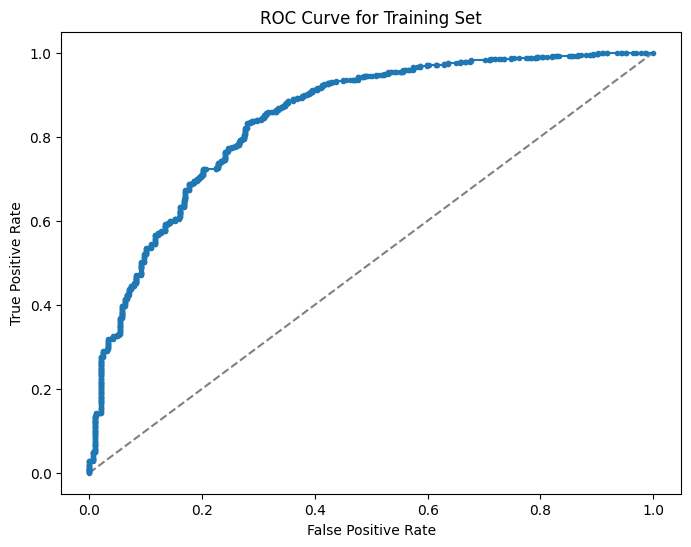

In [170]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Convert categorical labels to binary for training set if necessary
label_encoder = LabelEncoder()
y_train_binary = label_encoder.fit_transform(y_train)

# Predict probabilities
probs_lr = best_lr.predict_proba(x_train)
# Keep probabilities for the positive outcome only
probs_lr = probs_lr[:, 1]

# Calculate AUC
lr_train_auc = roc_auc_score(y_train_binary, probs_lr)
print('AUC: %.3f' % lr_train_auc)

# Calculate ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_binary, probs_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.plot(train_fpr, train_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set')
plt.show()


In [171]:
# Let's check ROC and AUC for test dataset

AUC: 0.846


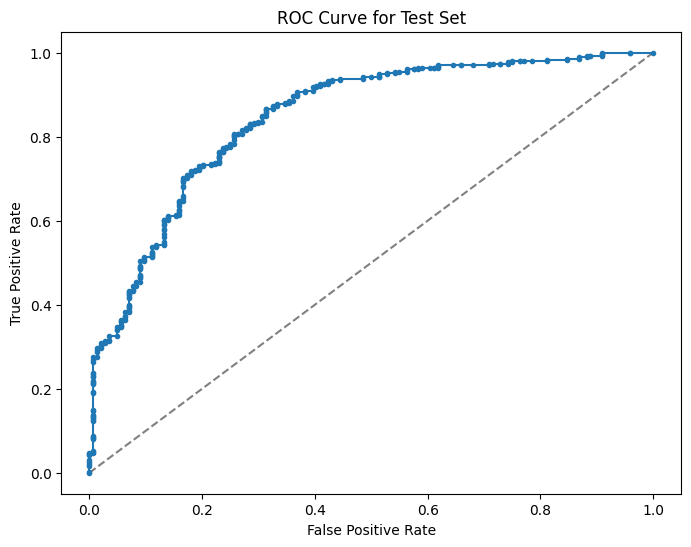

In [172]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Convert categorical labels to binary for test set if necessary
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Predict probabilities
probs_test_lr = best_lr.predict_proba(x_test)
# Keep probabilities for the positive outcome only
probs_test_lr = probs_test_lr[:, 1]

# Calculate AUC
lr_test_auc = roc_auc_score(y_test_binary, probs_test_lr)
print('AUC: %.3f' % lr_test_auc)

# Calculate ROC curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_binary, probs_test_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.plot(test_fpr, test_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.show()


# Now lets build LDA model

In [173]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [174]:
ldamodel = LinearDiscriminantAnalysis()
ldamodel.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [175]:
#lets fit the LDA model to train set

In [176]:
y_pred_lda = ldamodel.predict(x_train)
print(classification_report(y_train, y_pred_lda))
confusion_matrix(y_train,y_pred_lda)

              precision    recall  f1-score   support

           0       0.69      0.39      0.50       329
           1       0.89      0.97      0.93      1722

    accuracy                           0.87      2051
   macro avg       0.79      0.68      0.71      2051
weighted avg       0.86      0.87      0.86      2051



array([[ 127,  202],
       [  57, 1665]])

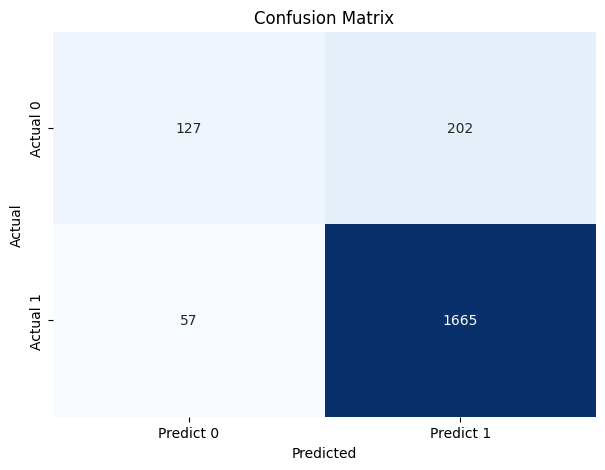

Predict 0  Predict 1
Actual 0        127        202
Actual 1         57       1665

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to binary if necessary
label_encoder = LabelEncoder()
y_train_binary = label_encoder.fit_transform(y_train)
y_pred_lda_binary = label_encoder.transform(y_pred_lda)  # Ensure predictions are transformed similarly

# Compute confusion matrix
cm = metrics.confusion_matrix(y_train_binary, y_pred_lda_binary, labels=[0, 1])

# Convert to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display DataFrame
df_cm


In [178]:
# lets fit the model in testing data

In [179]:
y_pred_test_lda = ldamodel.predict(x_test)
print(classification_report(y_test, y_pred_test_lda))
confusion_matrix(y_test,y_pred_test_lda)

              precision    recall  f1-score   support

           0       0.67      0.33      0.44       144
           1       0.88      0.97      0.92       735

    accuracy                           0.86       879
   macro avg       0.78      0.65      0.68       879
weighted avg       0.85      0.86      0.84       879



array([[ 47,  97],
       [ 23, 712]])

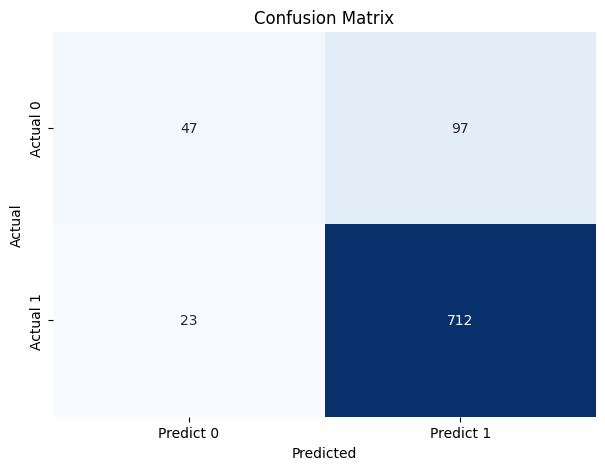

Predict 0  Predict 1
Actual 0         47         97
Actual 1         23        712

In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to binary if necessary
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_test_lda_binary = label_encoder.transform(y_pred_test_lda)  # Ensure predictions are transformed similarly

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test_binary, y_pred_test_lda_binary, labels=[0, 1])

# Convert to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display DataFrame
df_cm


In [182]:
### AUC and ROC for the training data

AUC: 0.832


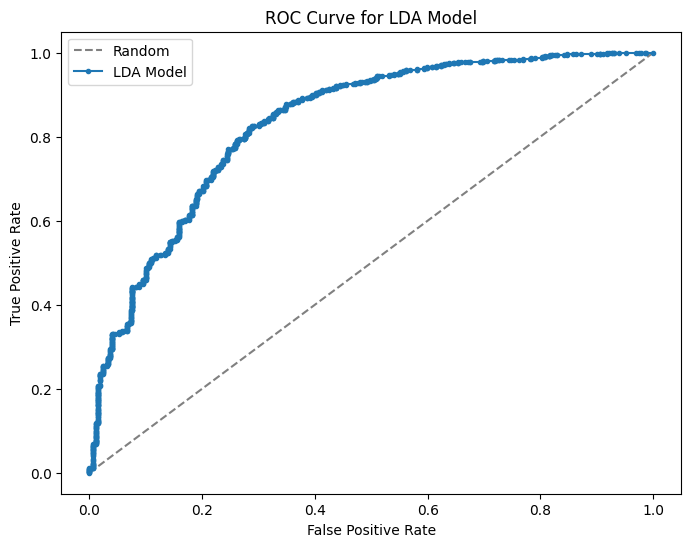

In [181]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Convert categorical labels to binary (0 and 1)
le = LabelEncoder()
y_train_binary = le.fit_transform(y_train)
y_test_binary = le.transform(y_test)

# Predict probabilities
probs_lda = ldamodel.predict_proba(x_train)
# Keep probabilities for the positive outcome only
probs_lda = probs_lda[:, 1]

# Calculate AUC
lr_train_auc = roc_auc_score(y_train_binary, probs_lda)
print('AUC: %.3f' % lr_train_auc)

# Calculate ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_binary, probs_lda)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.plot(train_fpr, train_tpr, marker='.', label='LDA Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA Model')
plt.legend()
plt.show()


In [183]:
### AUC and ROC for the test data

AUC: 0.850


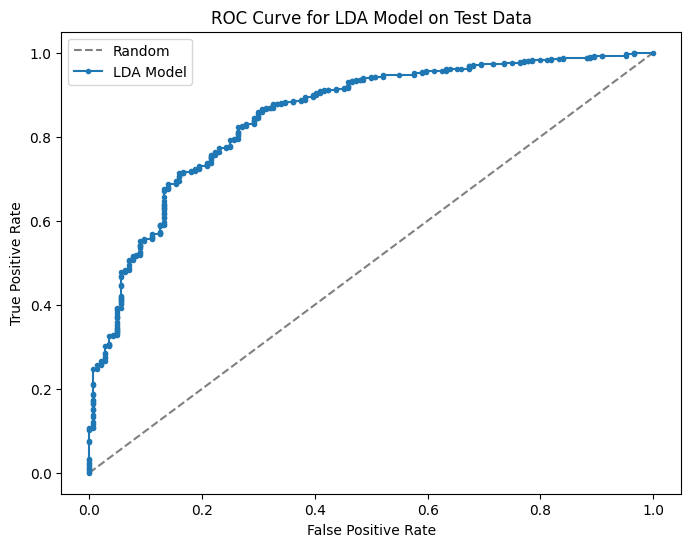

In [184]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Convert categorical labels to binary (0 and 1) for test data
y_test_binary = le.transform(y_test)

# Predict probabilities
probs_ldatest = ldamodel.predict_proba(x_test)
# Keep probabilities for the positive outcome only
probs_ldatest = probs_ldatest[:, 1]

# Calculate AUC
lr_test_auc = roc_auc_score(y_test_binary, probs_ldatest)
print('AUC: %.3f' % lr_test_auc)

# Calculate ROC curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_binary, probs_ldatest)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.plot(test_fpr, test_tpr, marker='.', label='LDA Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA Model on Test Data')
plt.legend()
plt.show()


In [185]:
# lets see that hyperparameter can improve our model

In [186]:
best_ldamodel = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
best_ldamodel.fit(x_train, y_train)

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [187]:
# Train dataset

In [188]:
ylda_train= best_ldamodel.predict(x_train)
print(classification_report(y_train,ylda_train))
confusion_matrix(y_train,ylda_train)
print(best_ldamodel.score(x_train, y_train))

              precision    recall  f1-score   support

           0       0.72      0.37      0.49       329
           1       0.89      0.97      0.93      1722

    accuracy                           0.88      2051
   macro avg       0.80      0.67      0.71      2051
weighted avg       0.86      0.88      0.86      2051

0.8756704046806436


Unique values in y_train: {0, 1}
Unique values in ylda_train: {0, 1}


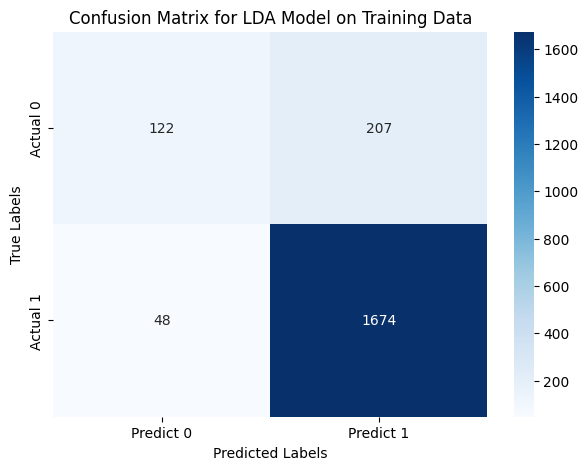

Predict 0  Predict 1
Actual 0        122        207
Actual 1         48       1674

In [189]:
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check if y_train and ylda_train have the correct values
print("Unique values in y_train:", set(y_train))
print("Unique values in ylda_train:", set(ylda_train))

# Convert y_train and ylda_train to binary labels if necessary
# For example, if they are categorical labels, convert them to numeric (0 and 1)
from sklearn.preprocessing import LabelEncoder

# Use LabelEncoder to convert categorical labels to binary
le = LabelEncoder()
y_train_binary = le.fit_transform(y_train)
ylda_train_binary = le.transform(ylda_train)  # Transform predictions using the same encoder

# Compute confusion matrix
cm_lda = metrics.confusion_matrix(y_train_binary, ylda_train_binary, labels=[0, 1])

# Convert to DataFrame for better visualization
df_cm = pd.DataFrame(cm_lda, index=["Actual 0", "Actual 1"], columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for LDA Model on Training Data')
plt.show()

# Display confusion matrix DataFrame
df_cm


In [190]:
# Test dataset

In [191]:
ylda_test= best_ldamodel.predict(x_test)
print(classification_report(y_test,ylda_test))
confusion_matrix(y_test,ylda_test)
print(best_ldamodel.score(x_test, y_test))

              precision    recall  f1-score   support

           0       0.71      0.35      0.47       144
           1       0.88      0.97      0.93       735

    accuracy                           0.87       879
   macro avg       0.80      0.66      0.70       879
weighted avg       0.86      0.87      0.85       879

0.8703071672354948


Unique values in y_test: {0, 1}
Unique values in ylda_test: {0, 1}


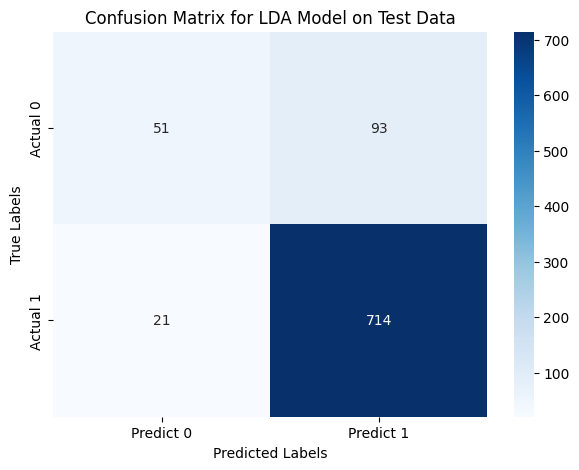

Predict 0  Predict 1
Actual 0         51         93
Actual 1         21        714

In [192]:
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check if y_test and ylda_test have the correct values
print("Unique values in y_test:", set(y_test))
print("Unique values in ylda_test:", set(ylda_test))

# Convert y_test and ylda_test to binary labels if necessary
from sklearn.preprocessing import LabelEncoder

# Use LabelEncoder to convert categorical labels to binary
le = LabelEncoder()
y_test_binary = le.fit_transform(y_test)
ylda_test_binary = le.transform(ylda_test)  # Transform predictions using the same encoder

# Compute confusion matrix
cm_lda_test = metrics.confusion_matrix(y_test_binary, ylda_test_binary, labels=[0, 1])

# Convert to DataFrame for better visualization
df_cm = pd.DataFrame(cm_lda_test, index=["Actual 0", "Actual 1"], columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for LDA Model on Test Data')
plt.show()

# Display confusion matrix DataFrame
df_cm


In [193]:
# AUC & ROC curve for best train model

AUC: 0.829


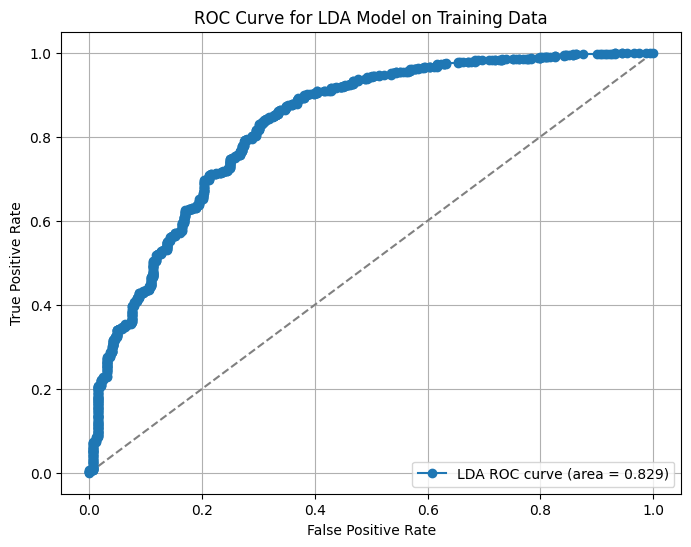

In [194]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit and transform the training and test labels
y_train_binary = le.fit_transform(y_train)
y_test_binary = le.transform(y_test)

# Predict probabilities for the training set
probs_train_tune = best_ldamodel.predict_proba(x_train)
probs_train_tune = probs_train_tune[:, 1]

# Calculate AUC
lda_train_auc = roc_auc_score(y_train_binary, probs_train_tune)
print('AUC: %.3f' % lda_train_auc)

# Calculate ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_binary, probs_train_tune)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.plot(train_fpr, train_tpr, marker='o', label='LDA ROC curve (area = %0.3f)' % lda_train_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA Model on Training Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [195]:
# AUC & ROC curve for best test model

AUC: 0.848


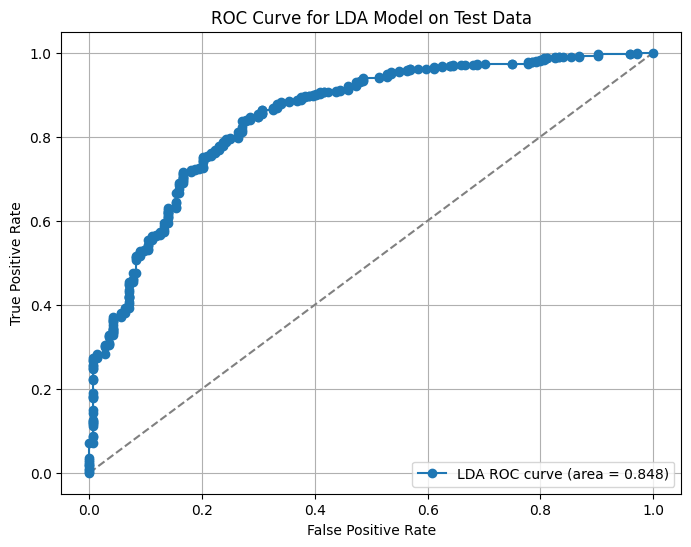

In [196]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit and transform the test labels
y_test_binary = le.fit_transform(y_test)

# Predict probabilities for the test set
probs_test_tune = best_ldamodel.predict_proba(x_test)
probs_test_tune = probs_test_tune[:, 1]

# Calculate AUC
lda_test_auc = roc_auc_score(y_test_binary, probs_test_tune)
print('AUC: %.3f' % lda_test_auc)

# Calculate ROC curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_binary, probs_test_tune)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.plot(test_fpr, test_tpr, marker='o', label='LDA ROC curve (area = %0.3f)' % lda_test_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA Model on Test Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# KNN Model

In [197]:
Y=df2.pop('Result')

In [198]:
X=df2

In [199]:
Xscaled=X.apply(zscore)

In [200]:
Xscaled

Avg_team_Age  Bowlers_in_team  All_rounder_in_team  First_selection  \
0        -5.052516         0.083177             0.252159         0.803208   
1        -2.362126         0.083177             1.173390        -1.245007   
2        -2.362126         0.083177            -0.669071         0.803208   
3        -2.362126        -0.907510            -0.669071         0.803208   
4        -2.362126        -1.898197             0.252159         0.803208   
...            ...              ...                  ...              ...   
2925      0.328264         0.083177             1.173390        -1.245007   
2926      0.328264         1.073864             0.252159         0.803208   
2927      0.328264         1.073864             0.252159         0.803208   
2928      0.328264         1.073864             0.252159        -1.245007   
2929      0.328264         1.073864             0.252159        -1.245007   

      Audience_number  Offshore  Max_run_scored_1over  Max_wicket_taken_1over  \
0           -0.750679 -0.617595             -0.600430                0.264714   
1           -0.782793 -0.617595             -0.874799               -1.586387   
2           -0.683824  1.619184             -0.326060                1.190264   
3           -0.804543 -0.617595             -0.051690                1.190264   
4           -0.680029 -0.617595             -0.874799                1.190264   
...               ...       ...                   ...                     ...   
2925        -0.249996 -0.617595             -0.051690                0.264714   
2926        -0.547925 -0.617595             -0.326060                1.190264   
2927        -0.127526  1.619184             -0.326060                1.190264   
2928        -0.665870 -0.617595             -0.326060               -0.660837   
2929        -0.523401 -0.617595             -0.874799                1.190264   

      Extra_bowls_bowled  Min_run_given_1over  ...  Opponent_Zimbabwe  \
0              -1.451878             0.028271  ...          -0.242711   
1              -1.451878            -1.163591  ...           4.120129   
2              -1.451878            -1.163591  ...           4.120129   
3              -1.451878             0.028271  ...          -0.242711   
4              -1.451878            -1.163591  ...          -0.242711   
...                  ...                  ...  ...                ...   
2925           -0.418538            -1.163591  ...          -0.242711   
2926           -0.418538             0.028271  ...          -0.242711   
2927           -0.160203             0.028271  ...          -0.242711   
2928            1.131472             0.028271  ...          -0.242711   
2929           -0.935208             1.816065  ...          -0.242711   

      Season_Summer  Season_Winter  Players_scored_zero_2  \
0          1.480446      -0.529183              -0.583393   
1          1.480446      -0.529183               1.714110   
2         -0.675472      -0.529183              -0.583393   
3          1.480446      -0.529183              -0.583393   
4          1.480446      -0.529183              -0.583393   
...             ...            ...                    ...   
2925       1.480446      -0.529183              -0.583393   
2926       1.480446      -0.529183               1.714110   
2927      -0.675472      -0.529183              -0.583393   
2928      -0.675472      -0.529183              -0.583393   
2929      -0.675472      -0.529183              -0.583393   

      Players_scored_zero_3  Players_scored_zero_4  player_highest_wicket_2  \
0                  0.829916              -0.328254                -0.754561   
1                 -1.204941              -0.328254                -0.754561   
2                  0.829916              -0.328254                -0.754561   
3                  0.829916              -0.328254                -0.754561   
4                  0.829916              -0.328254                -0.754561   
...                     

In [201]:
from sklearn.neighbors import KNeighborsClassifier

In [202]:
xtrain,xtest,ytrain,ytest= train_test_split(Xscaled,Y,test_size=0.30, random_state=1)

In [203]:
knnmodel = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [204]:
knnmodel.fit(xtrain,ytrain)

KNeighborsClassifier()

In [205]:
acc_train = []
acc_test = []

for i in np.arange(1,50):
    knnmodel = KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(xtrain, ytrain)
    acc_train.append(knnmodel.score(xtrain,ytrain))
    acc_test.append(knnmodel.score(xtest,ytest))

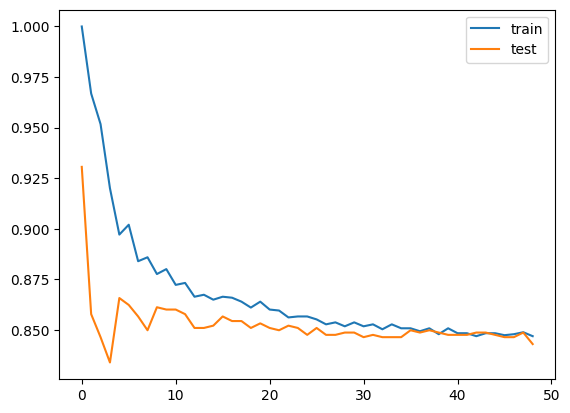

In [206]:
plt.plot(acc_train);
plt.plot(acc_test);
plt.legend(['train','test']);

In [207]:
KNN=pd.DataFrame(data=acc_test, columns=['Test'])
KNN['Train']=pd.DataFrame(data=acc_train)

In [208]:
KNN.head(10)

Test     Train
0  0.930603  1.000000
1  0.857793  0.966845
2  0.846416  0.951731
3  0.833902  0.920039
4  0.865757  0.897123
5  0.862344  0.901999
6  0.856655  0.883959
7  0.849829  0.885909
8  0.861206  0.877621
9  0.860068  0.880059

In [209]:
# let's for the model on train set

In [210]:
pred_knn_train=knnmodel.predict(xtrain)
print(classification_report(ytrain,pred_knn_train))
confusion_matrix(ytrain,pred_knn_train)
print(knnmodel.score(xtrain, ytrain))

              precision    recall  f1-score   support

           0       0.89      0.05      0.10       329
           1       0.85      1.00      0.92      1722

    accuracy                           0.85      2051
   macro avg       0.87      0.53      0.51      2051
weighted avg       0.85      0.85      0.79      2051

0.8469039492930278


In [211]:
# lets fit the model on test set

In [212]:
print(type(ytrain[0]), type(pred_knn_train[0]))  # Check the data types of the first elements


<class 'numpy.int8'> <class 'numpy.int8'>


In [213]:
print("Unique values in ytrain:", np.unique(ytrain))
print("Unique values in pred_knn_train:", np.unique(pred_knn_train))


Unique values in ytrain: [0 1]
Unique values in pred_knn_train: [0 1]


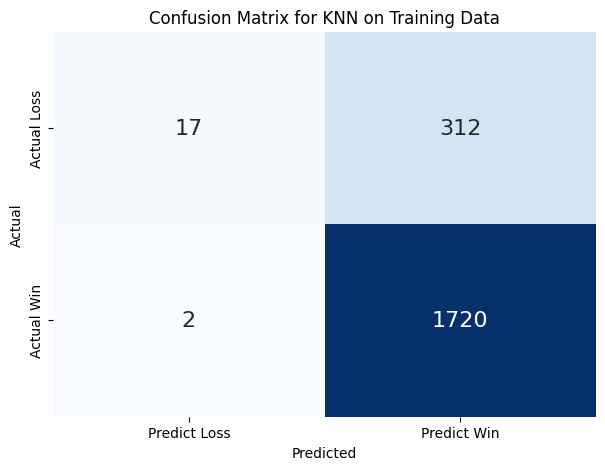

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

# Map numeric labels to string labels
label_mapping = {0: 'Loss', 1: 'Win'}
ytrain_str = [label_mapping[label] for label in ytrain]
pred_knn_train_str = [label_mapping[label] for label in pred_knn_train]

# Compute confusion matrix with string labels
cm = metrics.confusion_matrix(ytrain_str, pred_knn_train_str, labels=['Loss', 'Win'])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual Loss", "Actual Win"],
                     columns=["Predict Loss", "Predict Win"])

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN on Training Data')
plt.show()


In [215]:
# lets fit the model for test dataset

In [216]:
pred_knn_test=knnmodel.predict(xtest)
print(classification_report(ytest,pred_knn_test))
confusion_matrix(ytest,pred_knn_test)
print(knnmodel.score(xtest, ytest))

              precision    recall  f1-score   support

           0       0.88      0.05      0.09       144
           1       0.84      1.00      0.91       735

    accuracy                           0.84       879
   macro avg       0.86      0.52      0.50       879
weighted avg       0.85      0.84      0.78       879

0.8430034129692833


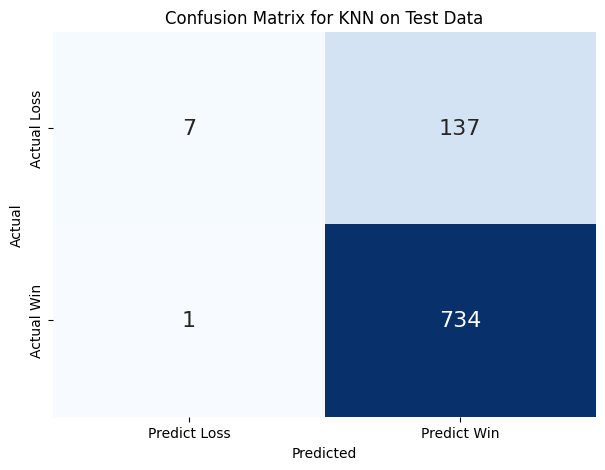

Predict Loss  Predict Win
Actual Loss             7          137
Actual Win              1          734

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

# Map numeric labels to string labels
label_mapping = {0: 'Loss', 1: 'Win'}
ytest_str = [label_mapping[label] for label in ytest]
pred_knn_test_str = [label_mapping[label] for label in pred_knn_test]

# Compute confusion matrix with string labels
cm = metrics.confusion_matrix(ytest_str, pred_knn_test_str, labels=['Loss', 'Win'])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual Loss", "Actual Win"],
                     columns=["Predict Loss", "Predict Win"])

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN on Test Data')
plt.show()

# Display the DataFrame
df_cm


In [218]:
# AUC and ROC curve for train

In [219]:
pip install imbalanced-learn

In [270]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.3, random_state=1)
le = LabelEncoder()
ytrain_binary = le.fit_transform(y_train)
print(np.unique(ytrain_binary))

[0 1]


[0 1]
AUC: 0.620


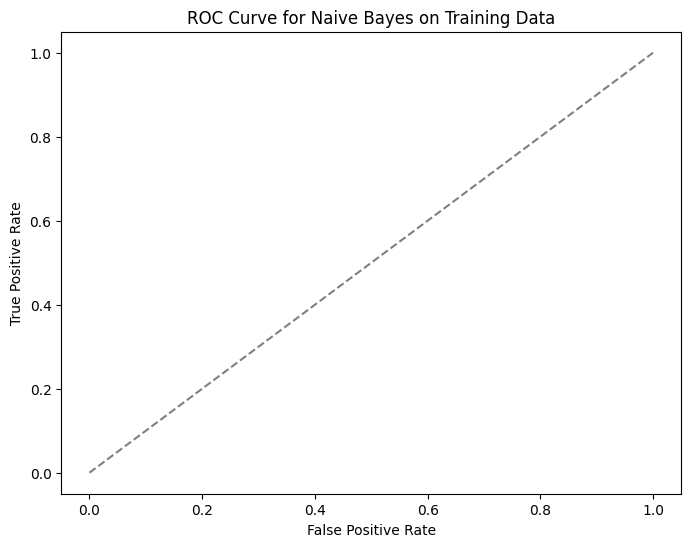

In [271]:
import numpy as np
from sklearn.naive_bayes import GaussianNB  # Import the Naive Bayes model
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Sample data (replace these with your actual training data)
# x_train = features
# y_train = true labels

# Define and train the Naive Bayes model
nb_model = GaussianNB()  # Create an instance of the Naive Bayes model
nb_model.fit(x_train, y_train)  # Fit the model with training data

# Predict the training data
predNB_train = nb_model.predict(x_train)  # Make predictions on the training set
print(np.unique(predNB_train))

# Convert string labels to binary for both true labels and predictions


# Calculate AUC
auc_score = roc_auc_score(y_train_binary, predNB_train)
print('AUC: %.3f' % auc_score)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train_numeric, predNB_train_numeric)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes on Training Data')
plt.show()



In [272]:
y_train

608     1
348     1
2844    0
1624    0
612     0
       ..
2763    1
905     0
1096    1
235     1
1061    1
Name: Result, Length: 2051, dtype: int8

AUC: 0.824


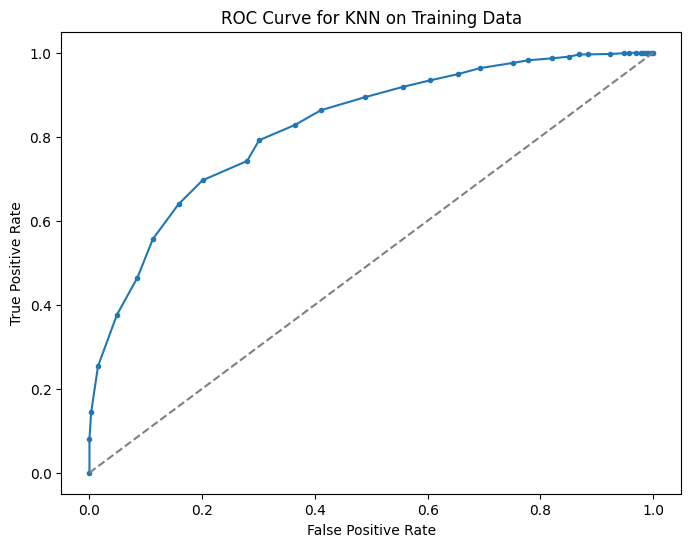

In [273]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Convert string labels to binary (if ytrain contains strings)

# Predict probabilities
probs_knn_train = knnmodel.predict_proba(xtrain)
# Keep probabilities for the positive outcome only
probs_knn_train = probs_knn_train[:, 1]

# Calculate AUC
knn_train_auc = roc_auc_score(ytrain_binary, probs_knn_train)
print('AUC: %.3f' % knn_train_auc)

# Calculate ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(ytrain_binary, probs_knn_train)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN on Training Data')
plt.show()


AUC: 0.824


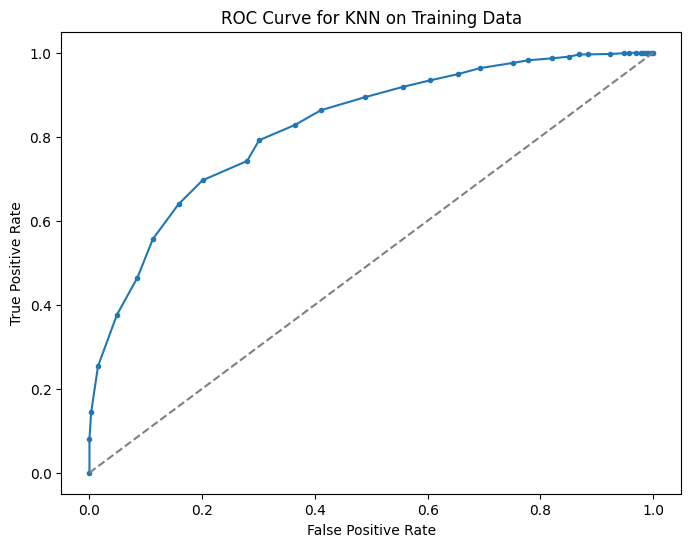

In [274]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Convert string labels to binary

# Predict probabilities
probs_knn_train = knnmodel.predict_proba(xtrain)
# Keep probabilities for the positive outcome only
probs_knn_train = probs_knn_train[:, 1]

# Calculate AUC
knn_train_auc = roc_auc_score(ytrain_binary, probs_knn_train)
print('AUC: %.3f' % knn_train_auc)

# Calculate ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(ytrain_binary, probs_knn_train)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN on Training Data')
plt.show()


In [ ]:
# AUC and ROC curve for test dataset

In [276]:
ytest

2126    1
192     1
2406    1
45      0
2477    1
       ..
551     1
1471    0
2319    1
2246    1
916     1
Name: Result, Length: 879, dtype: int8

AUC: 0.784


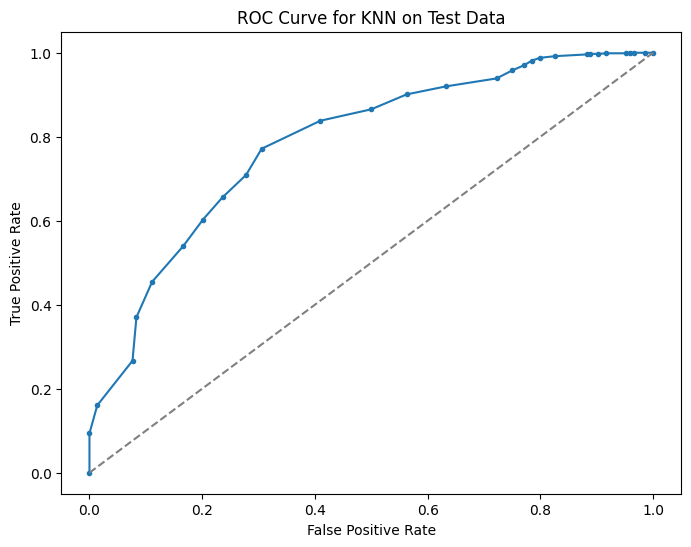

In [277]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Convert string labels to binary

# Predict probabilities
probs_knn_test = knnmodel.predict_proba(xtest)
# Keep probabilities for the positive outcome only
probs_knn_test = probs_knn_test[:, 1]

# Calculate AUC
knn_test_auc = roc_auc_score(ytest, probs_knn_test)
print('AUC: %.3f' % knn_test_auc)

# Calculate ROC curve
test_fpr, test_tpr, test_thresholds = roc_curve(ytest, probs_knn_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN on Test Data')
plt.show()


# Decission Tree Model

In [278]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [279]:
# lets fit the model on train dataset

In [280]:
y_train_predict_dt = DT_model.predict(x_train)
model_score = DT_model.score(x_train, y_train)
print(metrics.classification_report(y_train, y_train_predict_dt))
print(metrics.confusion_matrix(y_train, y_train_predict_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00      1722

    accuracy                           1.00      2051
   macro avg       1.00      1.00      1.00      2051
weighted avg       1.00      1.00      1.00      2051

[[ 329    0]
 [   0 1722]]


In [283]:
y_train_predict_dt

array([1, 1, 0, ..., 1, 1, 1], dtype=int8)

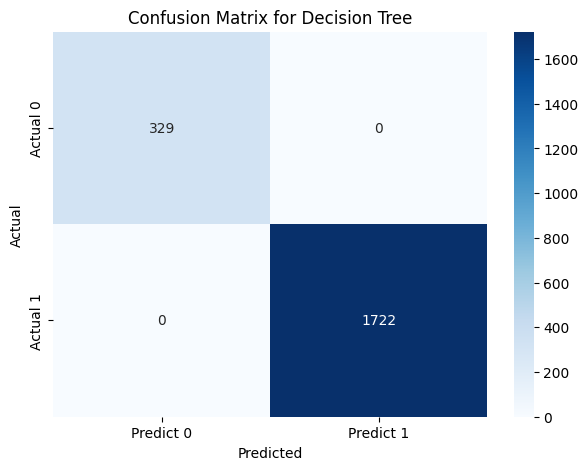

Predict 0  Predict 1
Actual 0        329          0
Actual 1          0       1722

In [285]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# Convert string labels to binary

# Compute confusion matrix
cm = metrics.confusion_matrix(y_train_binary, y_train_predict_dt, labels=[0, 1])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"],
                     columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Display the confusion matrix DataFrame
df_cm


In [287]:
# lets fit the model for test dataset

In [286]:
y_dt_predict_test = DT_model.predict(x_test)
model_score = DT_model.score(x_test, y_test)
print(metrics.classification_report(y_test, y_dt_predict_test))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       144
           1       0.96      0.94      0.95       735

    accuracy                           0.91       879
   macro avg       0.84      0.86      0.85       879
weighted avg       0.92      0.91      0.92       879



In [289]:
y_dt_predict_test

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

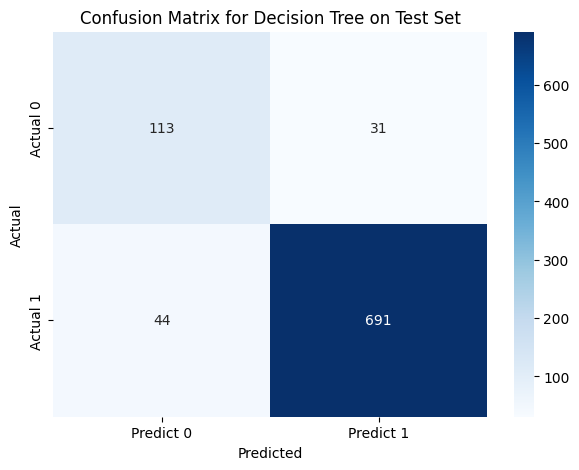

Predict 0  Predict 1
Actual 0        113         31
Actual 1         44        691

In [290]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# Convert string labels to binary

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test_binary, y_dt_predict_test, labels=[0, 1])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"],
                     columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree on Test Set')
plt.show()

# Display the confusion matrix DataFrame
df_cm


In [291]:
pd.DataFrame(data = DT_model.feature_importances_, columns=['imp'],
             index = x.columns).sort_values(by = 'imp', ascending = False)

imp
Audience_number                 0.188553
player_highest_run              0.097274
Extra_bowls_bowled              0.092124
Season_Summer                   0.065096
All_rounder_in_team             0.057614
Max_run_scored_1over            0.056117
Offshore                        0.054954
extra_bowls_opponent            0.047245
Bowlers_in_team                 0.043283
Min_run_given_1over             0.033515
Opponent_South Africa           0.032152
Min_run_scored_1over            0.030852
Max_wicket_taken_1over          0.030263
Match_light_type_Day and Night  0.024886
Players_scored_zero_4           0.022088
Avg_team_Age                    0.019910
Opponent_Srilanka               0.018978
Max_run_given_1over             0.016416
Opponent_Kenya                  0.014921
Season_Winter                   0.008176
Opponent_Zimbabwe               0.006820
Players_scored_zero_3           0.006723
Match_light_type_Night          0.006533
First_selection                 0.006239
player_highest_wicket_3         0.006034
Players_scored_zero_2           0.005913
Match_format_Test               0.005514
Match_format_T20                0.001810
Opponent_West Indies            0.000000
Opponent_Pakistan               0.000000
Opponent_England                0.000000
Opponent_Bangladesh             0.000000
player_highest_wicket_2         0.000000
player_highest_wicket_4         0.000000
player_highest_wicket_5         0.000000

# here we can see that our model is overfited
# To avoid overfitting we can use purning technique

In [292]:
# Lets build DT model using hyperparameter

In [293]:
from sklearn.tree import DecisionTreeClassifier

In [294]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [295]:
# Lets fit the train data on hyperparameter data

In [296]:
y_train_dt = dTreeR.predict(x_train)
print(metrics.classification_report(y_train, y_train_dt))
print(metrics.confusion_matrix(y_train, y_train_dt))

              precision    recall  f1-score   support

           0       0.75      0.17      0.27       329
           1       0.86      0.99      0.92      1722

    accuracy                           0.86      2051
   macro avg       0.81      0.58      0.60      2051
weighted avg       0.84      0.86      0.82      2051

[[  55  274]
 [  18 1704]]


In [298]:
y_dt_predict_test

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

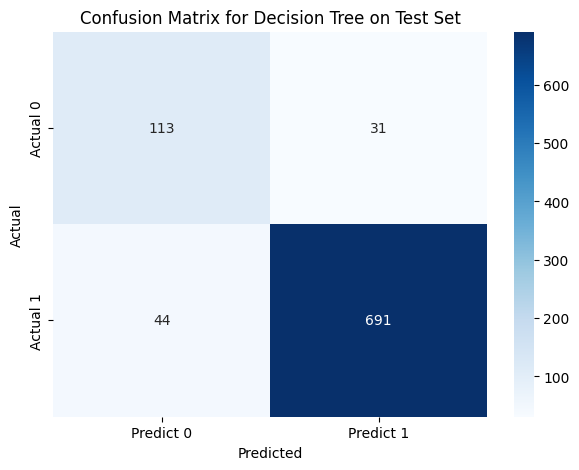

Predict 0  Predict 1
Actual 0        113         31
Actual 1         44        691

In [300]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# Convert string labels to binary

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test_binary, y_dt_predict_test, labels=[0, 1])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"],
                     columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree on Test Set')
plt.show()

# Display the confusion matrix DataFrame
df_cm


In [301]:
# Lets fit the test data on hyperparameter data

In [302]:
y_dt_test = dTreeR.predict(x_test)
print(metrics.classification_report(y_test, y_dt_test))
print(metrics.confusion_matrix(y_test, y_dt_test))

              precision    recall  f1-score   support

           0       0.75      0.12      0.21       144
           1       0.85      0.99      0.92       735

    accuracy                           0.85       879
   macro avg       0.80      0.56      0.57       879
weighted avg       0.84      0.85      0.80       879

[[ 18 126]
 [  6 729]]


In [303]:
y_dt_test

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

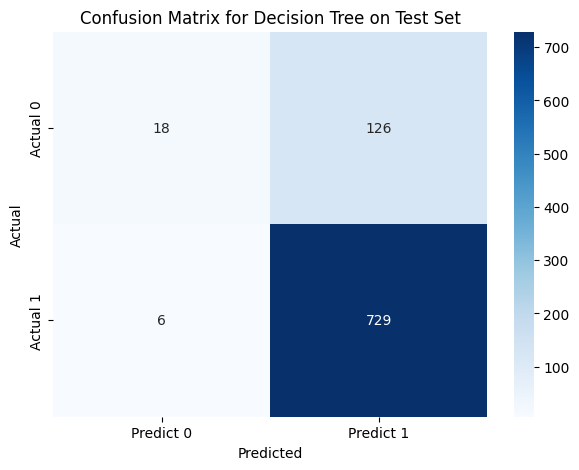

Predict 0  Predict 1
Actual 0         18        126
Actual 1          6        729

In [304]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# Convert string labels to binary

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test_binary, y_dt_test, labels=[0, 1])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"],
                     columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree on Test Set')
plt.show()

# Display the confusion matrix DataFrame
df_cm


In [305]:
pd.DataFrame(data = dTreeR.feature_importances_, columns=['imp'],
             index = x.columns).sort_values(by = 'imp', ascending = False)

imp
Extra_bowls_bowled              0.313183
Offshore                        0.310110
Audience_number                 0.257891
player_highest_run              0.085068
Max_run_given_1over             0.033748
Avg_team_Age                    0.000000
Season_Winter                   0.000000
Opponent_South Africa           0.000000
Opponent_Srilanka               0.000000
Opponent_West Indies            0.000000
Opponent_Zimbabwe               0.000000
Season_Summer                   0.000000
Players_scored_zero_2           0.000000
Opponent_Kenya                  0.000000
Players_scored_zero_3           0.000000
Players_scored_zero_4           0.000000
player_highest_wicket_2         0.000000
player_highest_wicket_3         0.000000
player_highest_wicket_4         0.000000
Opponent_Pakistan               0.000000
Match_format_Test               0.000000
Opponent_England                0.000000
Opponent_Bangladesh             0.000000
Bowlers_in_team                 0.000000
Match_format_T20                0.000000
Match_light_type_Night          0.000000
Match_light_type_Day and Night  0.000000
extra_bowls_opponent            0.000000
Min_run_scored_1over            0.000000
Min_run_given_1over             0.000000
Max_wicket_taken_1over          0.000000
Max_run_scored_1over            0.000000
First_selection                 0.000000
All_rounder_in_team             0.000000
player_highest_wicket_5         0.000000

# Random Forest Model

In [306]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

## Performance Matrix on train data set

In [307]:
y_train_predict = RF_model.predict(x_train)
print(metrics.classification_report(y_train, y_train_predict))
print(metrics.confusion_matrix(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00      1722

    accuracy                           1.00      2051
   macro avg       1.00      1.00      1.00      2051
weighted avg       1.00      1.00      1.00      2051

[[ 329    0]
 [   0 1722]]


# Lets for our model on test dataset

In [308]:
y_test_predict = RF_model.predict(x_test)
print(metrics.classification_report(y_test, y_test_predict))
print(metrics.confusion_matrix(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.94      0.72      0.82       144
           1       0.95      0.99      0.97       735

    accuracy                           0.95       879
   macro avg       0.94      0.86      0.89       879
weighted avg       0.95      0.95      0.94       879

[[104  40]
 [  7 728]]


# WE can see that our RF model is overfitted so we will use hyperparameter for this model

In [309]:
param_grid = {
    'max_depth': [4,6,8],
    'max_features': [4,5,6],
    'min_samples_leaf': [6,8,10],
    'min_samples_split': [45],
    'n_estimators': [100]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)


In [310]:
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [4, 6, 8], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [45], 'n_estimators': [100]})

In [311]:
best_grid_rf=grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(max_depth=8, max_features=6, min_samples_leaf=6,
                       min_samples_split=45, random_state=1)

In [312]:
ytrain_predict_rf = best_grid_rf.predict(x_train)
ytest_predict_rf = best_grid_rf.predict(x_test)

# For train dataset

In [313]:
print(classification_report(y_train,ytrain_predict_rf))
confusion_matrix(y_train,ytrain_predict_rf)

              precision    recall  f1-score   support

           0       0.95      0.19      0.31       329
           1       0.87      1.00      0.93      1722

    accuracy                           0.87      2051
   macro avg       0.91      0.59      0.62      2051
weighted avg       0.88      0.87      0.83      2051



array([[  61,  268],
       [   3, 1719]])

# For test dataset

In [314]:
print(classification_report(y_test,ytest_predict_rf))
confusion_matrix(y_test,ytest_predict_rf)

              precision    recall  f1-score   support

           0       0.95      0.13      0.23       144
           1       0.85      1.00      0.92       735

    accuracy                           0.86       879
   macro avg       0.90      0.57      0.58       879
weighted avg       0.87      0.86      0.81       879



array([[ 19, 125],
       [  1, 734]])

# Naive Bayes Model

In [315]:
from sklearn.naive_bayes import GaussianNB

In [316]:
# Let's build model on unscaled data

In [317]:
gnbmodel = GaussianNB()
gnbmodel.fit(x_train, y_train)

GaussianNB()

# For Train dataset

In [318]:
predNB_train = gnbmodel.predict(x_train)
print(classification_report(y_train, predNB_train))
confusion_matrix(y_train, predNB_train)

              precision    recall  f1-score   support

           0       0.34      0.38      0.36       329
           1       0.88      0.86      0.87      1722

    accuracy                           0.78      2051
   macro avg       0.61      0.62      0.61      2051
weighted avg       0.79      0.78      0.79      2051



array([[ 125,  204],
       [ 242, 1480]])

In [320]:
predNB_train

array([1, 0, 1, ..., 1, 0, 1], dtype=int8)

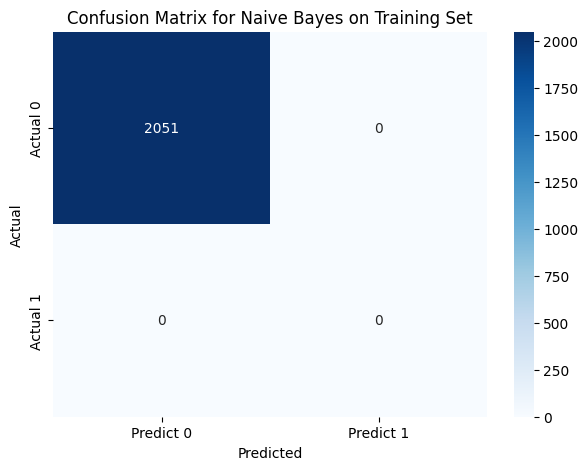

Predict 0  Predict 1
Actual 0       2051          0
Actual 1          0          0

In [321]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# Convert string labels to binary

# Compute confusion matrix
cm = metrics.confusion_matrix(y_train_numeric, predNB_train_numeric, labels=[0, 1])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"],
                     columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes on Training Set')
plt.show()

# Display the confusion matrix DataFrame
df_cm


# For test dataset

In [322]:
predNB_test = gnbmodel.predict(x_test)
print(classification_report(y_test, predNB_test))
confusion_matrix(y_test, predNB_test)

              precision    recall  f1-score   support

           0       0.41      0.42      0.41       144
           1       0.89      0.88      0.88       735

    accuracy                           0.81       879
   macro avg       0.65      0.65      0.65       879
weighted avg       0.81      0.81      0.81       879



array([[ 60,  84],
       [ 87, 648]])

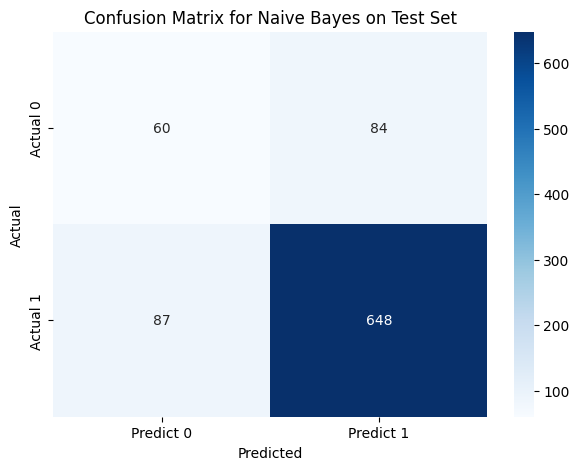

Predict 0  Predict 1
Actual 0         60         84
Actual 1         87        648

In [331]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# Convert string labels to numeric labels

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, predNB_test, labels=[0, 1])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"],
                     columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes on Test Set')
plt.show()

# Display the confusion matrix DataFrame
df_cm


# Now we will fit the Model on scaled dataset

In [332]:
gnbmodel_scl = GaussianNB()
gnbmodel_scl.fit(xtrain, ytrain)

GaussianNB()

# For train dataset

In [333]:
predNB_train_scal = gnbmodel_scl.predict(xtrain)
print(classification_report(ytrain, predNB_train_scal))
confusion_matrix(ytrain, predNB_train_scal)

              precision    recall  f1-score   support

           0       0.25      0.84      0.38       329
           1       0.94      0.51      0.66      1722

    accuracy                           0.56      2051
   macro avg       0.60      0.68      0.52      2051
weighted avg       0.83      0.56      0.62      2051



array([[277,  52],
       [842, 880]])

In [334]:
predNB_train_scal

array([1, 0, 1, ..., 1, 0, 0], dtype=int8)

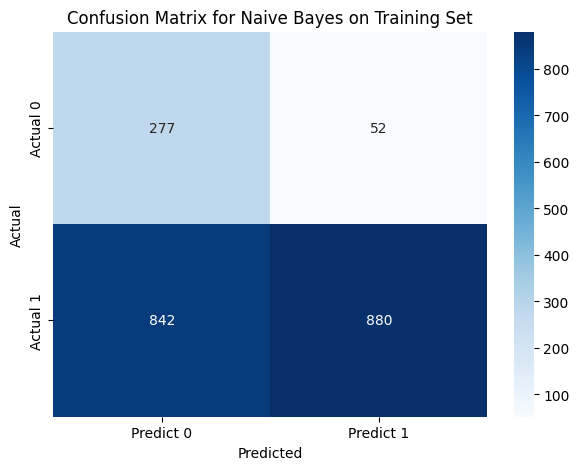

Predict 0  Predict 1
Actual 0        277         52
Actual 1        842        880

In [335]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# Convert string labels to numeric labels

# Compute confusion matrix
cm = metrics.confusion_matrix(ytrain, predNB_train_scal, labels=[0, 1])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"],
                     columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes on Training Set')
plt.show()

# Display the confusion matrix DataFrame
df_cm


# For test Dataset

In [336]:
predNB_test_scal = gnbmodel_scl.predict(xtest)
print(classification_report(ytest, predNB_test_scal))
confusion_matrix(ytest, predNB_test_scal)

              precision    recall  f1-score   support

           0       0.25      0.83      0.39       144
           1       0.94      0.52      0.67       735

    accuracy                           0.57       879
   macro avg       0.60      0.68      0.53       879
weighted avg       0.83      0.57      0.62       879



array([[120,  24],
       [354, 381]])

In [338]:
predNB_test_scal

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,

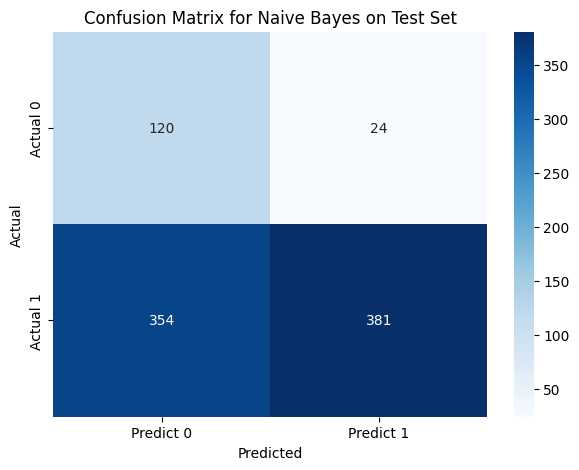

Predict 0  Predict 1
Actual 0        120         24
Actual 1        354        381

In [340]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# Convert string labels to numeric labels

# Compute confusion matrix
cm = metrics.confusion_matrix(ytest, predNB_test_scal, labels=[0, 1])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"],
                     columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes on Test Set')
plt.show()

# Display the confusion matrix DataFrame
df_cm


# Neural Network Model

In [341]:
from sklearn.neural_network import MLPClassifier

In [342]:
model_nn = MLPClassifier(random_state=1)

In [343]:
model_nn.fit(x_train,y_train)

MLPClassifier(random_state=1)

In [344]:
ytrain_predict_nn = model_nn.predict(x_train)
ytest_predict_nn = model_nn.predict(x_test)

# For train dataset

In [345]:
print(classification_report(y_train,ytrain_predict_nn))
confusion_matrix(y_train,ytrain_predict_nn)

              precision    recall  f1-score   support

           0       0.24      0.59      0.34       329
           1       0.89      0.63      0.74      1722

    accuracy                           0.63      2051
   macro avg       0.56      0.61      0.54      2051
weighted avg       0.79      0.63      0.67      2051



array([[ 195,  134],
       [ 633, 1089]])

In [347]:
ytrain_predict_nn

array([1, 0, 0, ..., 0, 1, 1], dtype=int8)

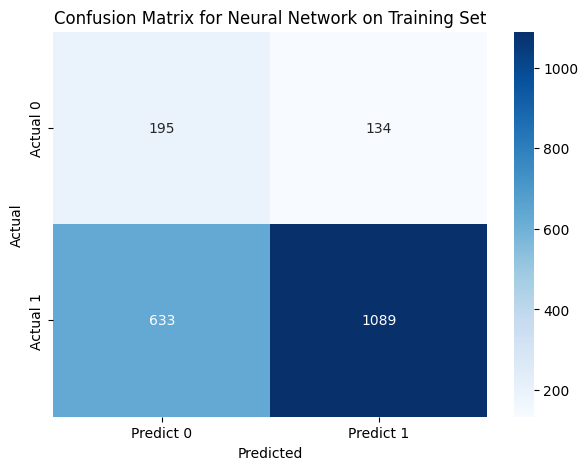

Predict 0  Predict 1
Actual 0        195        134
Actual 1        633       1089

In [349]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# Convert string labels to numeric labels

# Compute confusion matrix
cm = metrics.confusion_matrix(y_train, ytrain_predict_nn, labels=[0, 1])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"],
                     columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network on Training Set')
plt.show()

# Display the confusion matrix DataFrame
df_cm


# For test dataset

In [350]:
print(classification_report(y_test,ytest_predict_nn))
confusion_matrix(y_test,ytest_predict_nn)

              precision    recall  f1-score   support

           0       0.26      0.63      0.37       144
           1       0.90      0.65      0.76       735

    accuracy                           0.65       879
   macro avg       0.58      0.64      0.56       879
weighted avg       0.80      0.65      0.69       879



array([[ 91,  53],
       [256, 479]])

In [352]:
ytest_predict_nn

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

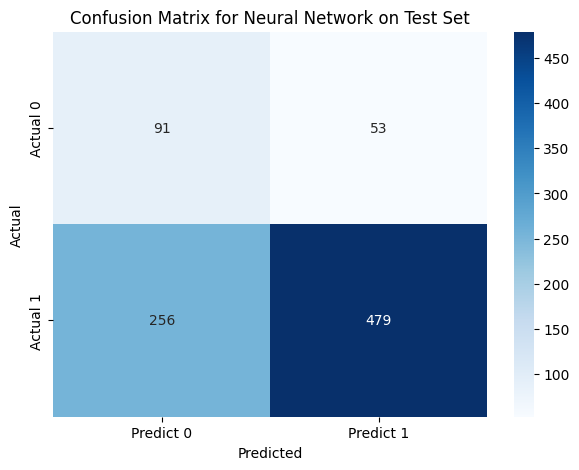

Predict 0  Predict 1
Actual 0         91         53
Actual 1        256        479

In [353]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# Convert string labels to numeric labels

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, ytest_predict_nn, labels=[0, 1])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"],
                     columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network on Test Set')
plt.show()

# Display the confusion matrix DataFrame
df_cm


# Now Fit Neural Network on scaled data

In [354]:
model_nn_scl = MLPClassifier(random_state=1)

In [355]:
model_nn_scl.fit(xtrain,ytrain)

MLPClassifier(random_state=1)

In [356]:
ytrain_predict_nn_scl = model_nn.predict(xtrain)
ytest_predict_nn_scl = model_nn.predict(xtest)

# For train dataset

In [357]:
print(classification_report(ytrain,ytrain_predict_nn_scl))
confusion_matrix(ytrain,ytrain_predict_nn_scl)


              precision    recall  f1-score   support

           0       0.22      0.91      0.36       329
           1       0.96      0.40      0.56      1722

    accuracy                           0.48      2051
   macro avg       0.59      0.65      0.46      2051
weighted avg       0.84      0.48      0.53      2051



array([[ 298,   31],
       [1036,  686]])

In [359]:
ytrain_predict_nn_scl

array([1, 1, 0, ..., 1, 0, 0], dtype=int8)

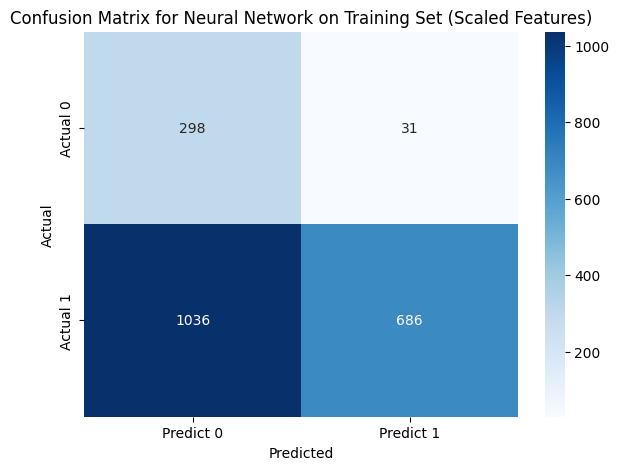

Predict 0  Predict 1
Actual 0        298         31
Actual 1       1036        686

In [360]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# Convert string labels to numeric labels

# Compute confusion matrix
cm = metrics.confusion_matrix(y_train, ytrain_predict_nn_scl, labels=[0, 1])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"],
                     columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network on Training Set (Scaled Features)')
plt.show()

# Display the confusion matrix DataFrame
df_cm


# For Test dataset

In [361]:
print(classification_report(ytest,ytest_predict_nn_scl))
confusion_matrix(ytest,ytest_predict_nn_scl)

              precision    recall  f1-score   support

           0       0.25      0.92      0.39       144
           1       0.97      0.44      0.61       735

    accuracy                           0.52       879
   macro avg       0.61      0.68      0.50       879
weighted avg       0.85      0.52      0.57       879



array([[133,  11],
       [408, 327]])

In [362]:
ytest_predict_nn_scl

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,

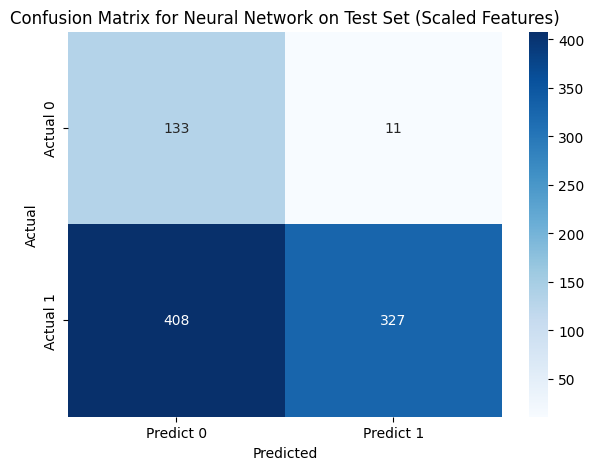

Predict 0  Predict 1
Actual 0        133         11
Actual 1        408        327

In [363]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# Convert string labels to numeric labels

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, ytest_predict_nn_scl, labels=[0, 1])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"],
                     columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network on Test Set (Scaled Features)')
plt.show()

# Display the confusion matrix DataFrame
df_cm


# Ensemble modeling Method

### Bagging method

In [364]:
from sklearn.ensemble import BaggingClassifier

In [365]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a base estimator
base_estimator = DecisionTreeClassifier()

# Initialize BaggingClassifier with the base estimator
Bagging_model = BaggingClassifier(estimator=base_estimator, random_state=1)

# Fit the model to the training data
Bagging_model.fit(x_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1)

# Lets build model for train dataset

In [366]:
y_train_predict_bg = Bagging_model.predict(x_train)
print(metrics.classification_report(y_train, y_train_predict_bg))
print(metrics.confusion_matrix(y_train, y_train_predict_bg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00      1722

    accuracy                           1.00      2051
   macro avg       1.00      1.00      1.00      2051
weighted avg       1.00      1.00      1.00      2051

[[ 328    1]
 [   0 1722]]


Unique values in y_train: {0, 1}
Unique values in y_train_predict_bg: {0, 1}


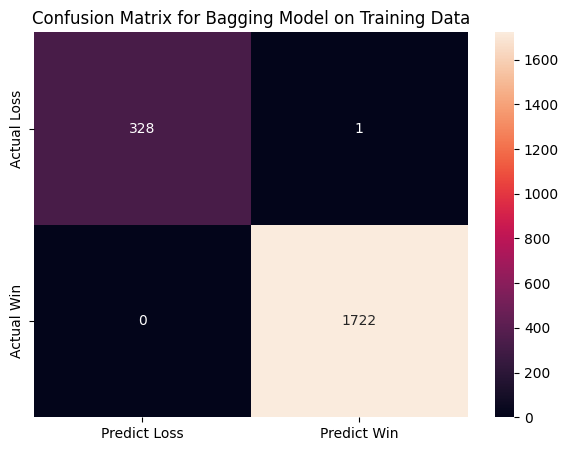

In [368]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize BaggingClassifier with a base estimator
base_estimator = DecisionTreeClassifier()
Bagging_model = BaggingClassifier(base_estimator=base_estimator, random_state=1)

# Fit the model to the training data
Bagging_model.fit(x_train, y_train)

# Predict on the training data
y_train_predict_bg = Bagging_model.predict(x_train)

# Check unique values in y_train and y_train_predict_bg
print("Unique values in y_train:", set(y_train))
print("Unique values in y_train_predict_bg:", set(y_train_predict_bg))

# Compute confusion matrix with string labels
cm = metrics.confusion_matrix(y_train, y_train_predict_bg, labels=[0, 1])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual Loss", "Actual Win"], columns=["Predict Loss", "Predict Win"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Bagging Model on Training Data')
plt.show()


In [369]:
# AUC and ROC For Train

AUC: 1.000


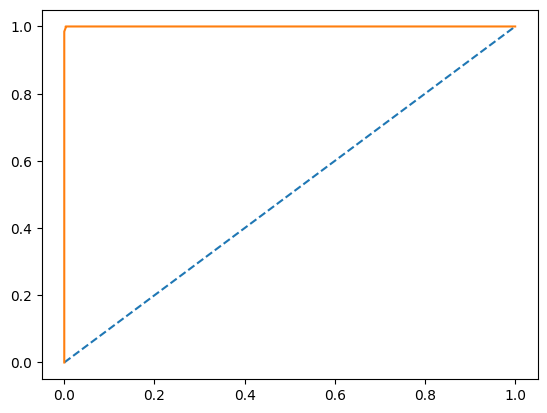

In [370]:
# predict probabilities
probs_train = Bagging_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
rfb_train_auc = roc_auc_score(y_train, probs_train)
print('AUC: %.3f' % rfb_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# For Test dataset

In [371]:
y_test_predict_bg = Bagging_model.predict(x_test)
print(metrics.classification_report(y_test, y_test_predict_bg))
print(metrics.confusion_matrix(y_test, y_test_predict_bg))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       144
           1       0.96      0.98      0.97       735

    accuracy                           0.95       879
   macro avg       0.92      0.88      0.90       879
weighted avg       0.95      0.95      0.95       879

[[113  31]
 [ 15 720]]


In [372]:
y_test

2126    1
192     1
2406    1
45      0
2477    1
       ..
551     1
1471    0
2319    1
2246    1
916     1
Name: Result, Length: 879, dtype: int8

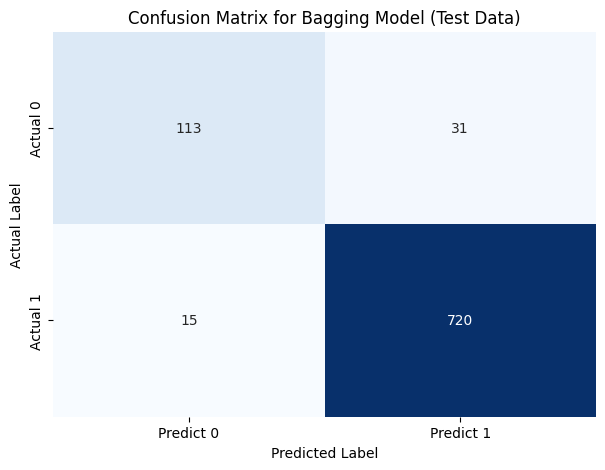

Predict 0  Predict 1
Actual 0        113         31
Actual 1         15        720

In [374]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_predict_bg, labels=[0, 1])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Bagging Model (Test Data)')
plt.show()

df_cm


In [375]:
# AUC and ROC for test

AUC: 0.937


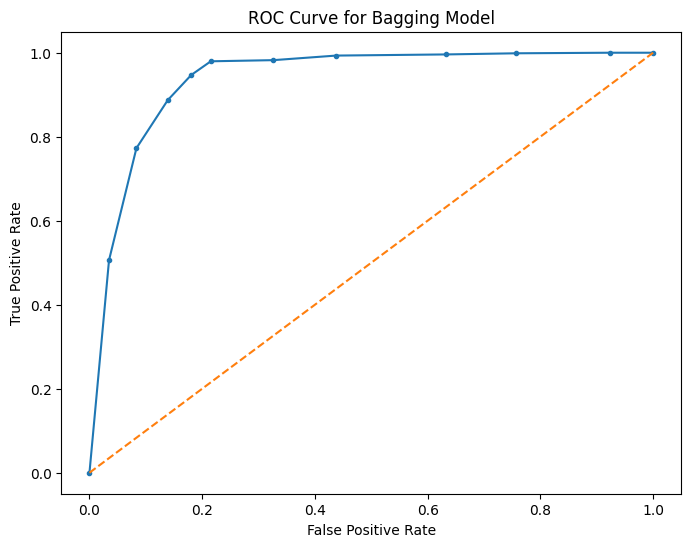

In [376]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform y_train and y_test
y_train_numeric = label_encoder.fit_transform(y_train)
y_test_numeric = label_encoder.transform(y_test)

# Predict probabilities for the test set
probs_test_bg = Bagging_model.predict_proba(x_test)
# Keep probabilities for the positive outcome only
probs_test_bg = probs_test_bg[:, 1]

# Calculate AUC
rfb_test_auc = roc_auc_score(y_test_numeric, probs_test_bg)
print('AUC: %.3f' % rfb_test_auc)

# Calculate ROC curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_numeric, probs_test_bg)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bagging Model')
plt.show()


### ADA Boost Method

In [377]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(random_state=1)
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

# For train dataset

In [379]:
y_train_predict_ada = ADB_model.predict(x_train)
print(metrics.classification_report(y_train, y_train_predict_ada))
print(metrics.confusion_matrix(y_train, y_train_predict_ada))

              precision    recall  f1-score   support

           0       0.78      0.39      0.52       329
           1       0.89      0.98      0.93      1722

    accuracy                           0.88      2051
   macro avg       0.84      0.68      0.73      2051
weighted avg       0.87      0.88      0.87      2051

[[ 127  202]
 [  36 1686]]


In [380]:
y_train_predict_ada

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

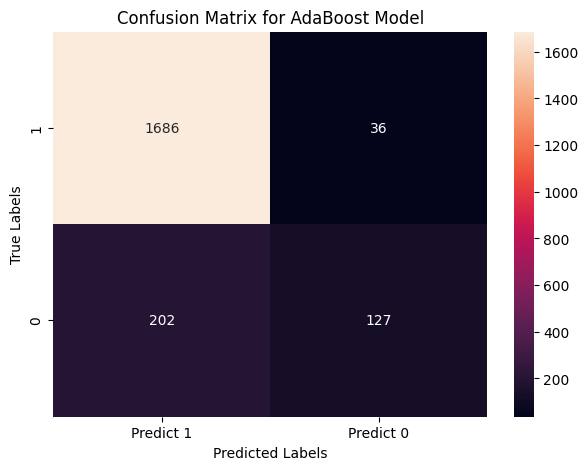

In [381]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics


# Compute confusion matrix
cm = metrics.confusion_matrix(y_train, y_train_predict_ada, labels=[1, 0])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["1", "0"], columns=["Predict 1", "Predict 0"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for AdaBoost Model')
plt.show()



In [382]:
# AUC and ROC for train dataset

AUC: 0.876


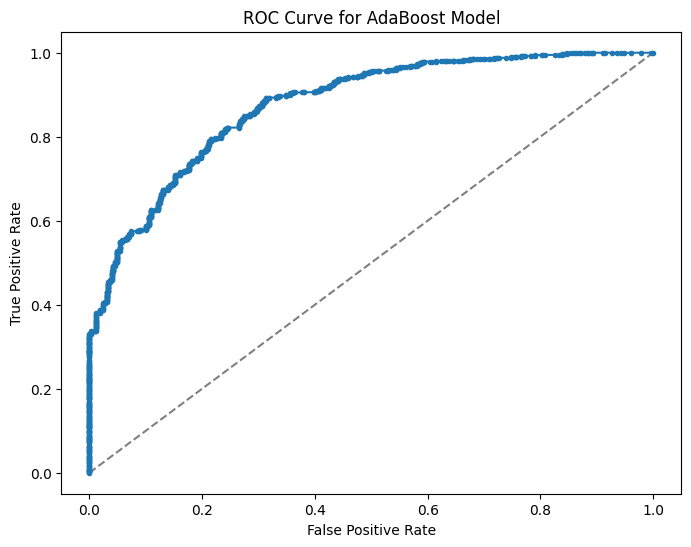

In [383]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score

# Convert categorical labels to numeric
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)

# Predict probabilities
probs = ADB_model.predict_proba(x_train)
# Keep probabilities for the positive outcome only
probs = probs[:, 1]

# Calculate AUC
adb_train_auc = roc_auc_score(y_train_numeric, probs)
print('AUC: %.3f' % adb_train_auc)

# Calculate ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_numeric, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.plot(train_fpr, train_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost Model')
plt.show()


# For Test dataset

In [384]:
y_test_predict_ada = ADB_model.predict(x_test)
print(metrics.classification_report(y_test, y_test_predict_ada))
print(metrics.confusion_matrix(y_test, y_test_predict_ada))

              precision    recall  f1-score   support

           0       0.70      0.33      0.45       144
           1       0.88      0.97      0.92       735

    accuracy                           0.87       879
   macro avg       0.79      0.65      0.69       879
weighted avg       0.85      0.87      0.85       879

[[ 48  96]
 [ 21 714]]


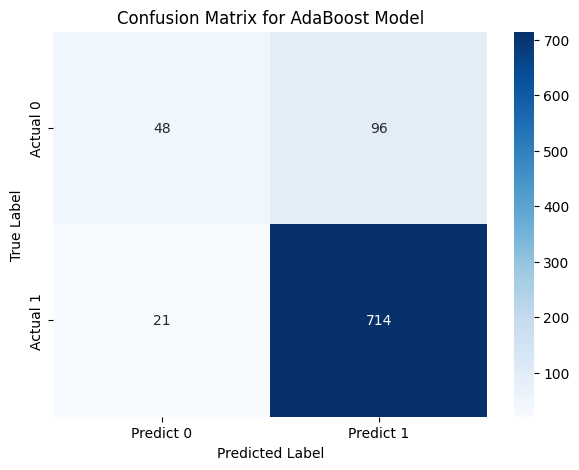

Predict 0  Predict 1
Actual 0         48         96
Actual 1         21        714

In [385]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


# Predict using the AdaBoost model
y_test_predict_ada = ADB_model.predict(x_test)

# Convert predicted labels to numeric if needed

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_predict_ada, labels=[0, 1])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"],
                     columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost Model')
plt.show()

df_cm


In [386]:
# AUC and ROC for test dataset

AUC: 0.848


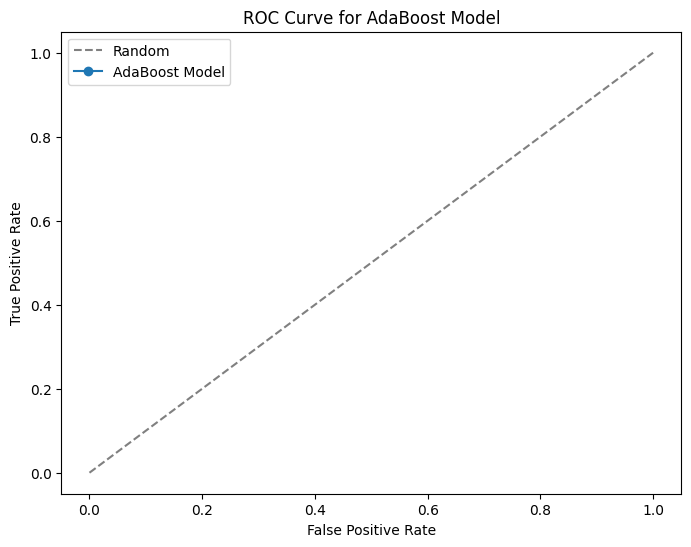

In [387]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
probs = ADB_model.predict_proba(x_test)
# Keep probabilities for the positive outcome only
probs = probs[:, 1]

# Calculate AUC
adb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % adb_test_auc)

# Specify the positive class label
pos_label = 'Win'

# Calculate ROC curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs, pos_label=pos_label)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.plot(test_fpr, test_tpr, marker='o', label='AdaBoost Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost Model')
plt.legend()
plt.show()


### Gradient boosting method

In [388]:
from sklearn.ensemble import GradientBoostingClassifier

In [389]:
gbcl = GradientBoostingClassifier(random_state=1)
gbcl.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

# For train Dataset

In [390]:
y_train_predict_gb = gbcl.predict(x_train)
print(metrics.classification_report(y_train, y_train_predict_gb))
print(metrics.confusion_matrix(y_train, y_train_predict_gb))

              precision    recall  f1-score   support

           0       0.96      0.57      0.71       329
           1       0.92      1.00      0.96      1722

    accuracy                           0.93      2051
   macro avg       0.94      0.78      0.84      2051
weighted avg       0.93      0.93      0.92      2051

[[ 187  142]
 [   8 1714]]


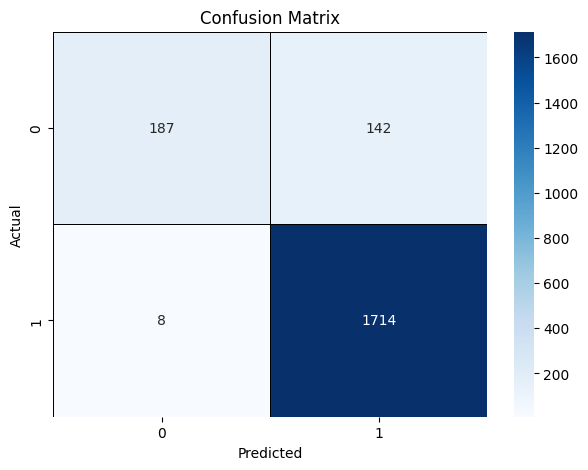

0     1
0  187   142
1    8  1714

In [392]:
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example labels, replace with actual labels used in your model
actual_labels = [0, 1]

# Compute confusion matrix
cm = metrics.confusion_matrix(y_train, y_train_predict_gb, labels=actual_labels)

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=actual_labels, columns=actual_labels)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

df_cm


In [393]:
# ROC and AUC for train

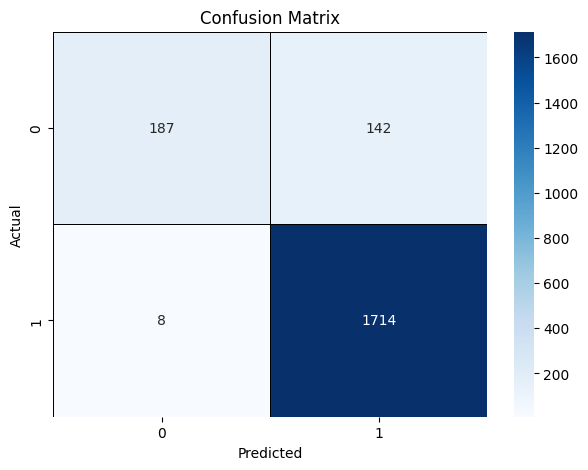

0     1
0  187   142
1    8  1714

In [395]:
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example labels, replace with actual labels used in your model
actual_labels = [0, 1]

# Compute confusion matrix
cm = metrics.confusion_matrix(y_train, y_train_predict_gb, labels=actual_labels)

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=actual_labels, columns=actual_labels)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

df_cm


# For Test dataset

In [396]:
y_test_predict_gb = gbcl.predict(x_test)
print(metrics.classification_report(y_test, y_test_predict_gb))
print(metrics.confusion_matrix(y_test, y_test_predict_gb))

              precision    recall  f1-score   support

           0       0.89      0.44      0.59       144
           1       0.90      0.99      0.94       735

    accuracy                           0.90       879
   macro avg       0.89      0.71      0.76       879
weighted avg       0.90      0.90      0.88       879

[[ 63  81]
 [  8 727]]


In [397]:
y_test_predict_gb

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

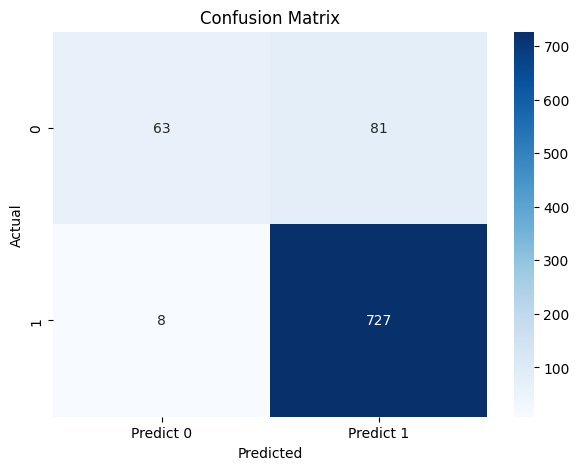

In [398]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Convert y_test_predict_gb to binary values

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test_binary, y_test_predict_gb, labels=[0, 1])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["0", "1"], columns=["Predict 0", "Predict 1"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [399]:
# ROC and AUC for test dataset

AUC: 0.894


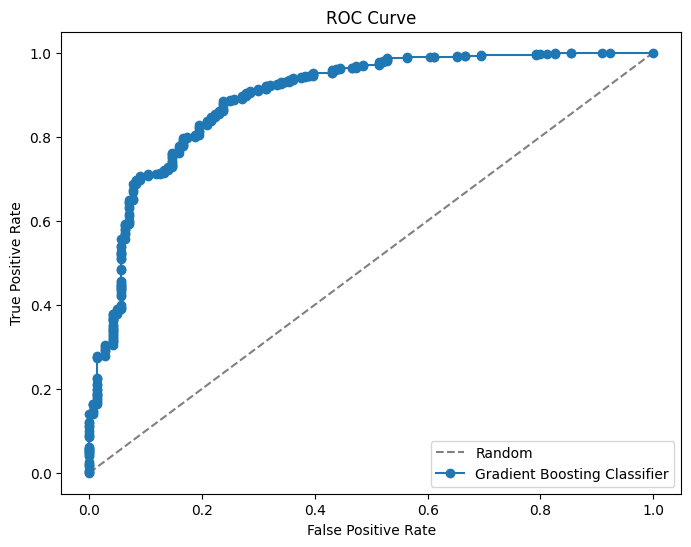

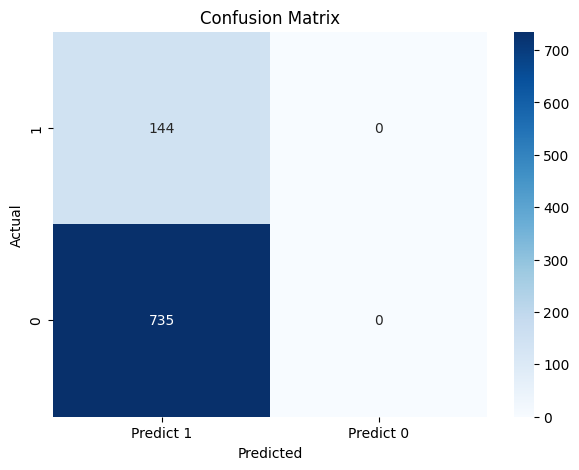

In [400]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Convert categorical labels to binary values if they are categorical

# Predict probabilities
probs_gb = gbcl.predict_proba(x_test)
# Keep probabilities for the positive outcome only
probs_gb = probs_gb[:, 1]

# Calculate AUC
gb_test_auc = roc_auc_score(y_test, probs_gb)
print('AUC: %.3f' % gb_test_auc)

# Calculate ROC curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_gb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.plot(test_fpr, test_tpr, marker='o', label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
import numpy as np

# Assuming y_test_predict_gb contains categorical labels ('Loss' and 'Win')
# Convert categorical labels to binary values
y_test_predict_gb_binary = np.where(y_test_predict_gb == 'Win', 1, 0)

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test_binary, y_test_predict_gb_binary, labels=[0, 1])

# Convert confusion matrix to DataFrame for easier plotting
df_cm = pd.DataFrame(cm, index=["1", "0"], columns=["Predict 1", "Predict 0"])

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [401]:
grid_GD= {'n_estimators':[40,50,60],
      'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],'loss':['deviance','exponential'],'max_features':[6,7,8],'min_samples_leaf':[30,40,50]
      }
grid_search_GD= GridSearchCV(estimator=gbcl, param_grid=grid_GD, cv=3,n_jobs=2)

In [402]:
grid_search_GD.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=2,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'loss': ['deviance', 'exponential'],
                         'max_features': [6, 7, 8],
                         'min_samples_leaf': [30, 40, 50],
                         'n_estimators': [40, 50, 60]})

In [403]:
grid_search_GD.best_params_

{'criterion': 'friedman_mse',
 'loss': 'exponential',
 'max_features': 7,
 'min_samples_leaf': 30,
 'n_estimators': 60}

In [404]:
best_GDmodel= grid_search_GD.best_estimator_
best_GDmodel

GradientBoostingClassifier(loss='exponential', max_features=7,
                           min_samples_leaf=30, n_estimators=60,
                           random_state=1)

In [405]:
y_train_predict_gb = best_GDmodel.predict(x_train)
print(metrics.classification_report(y_train, y_train_predict_gb))
print(metrics.confusion_matrix(y_train, y_train_predict_gb))

              precision    recall  f1-score   support

           0       0.88      0.31      0.46       329
           1       0.88      0.99      0.93      1722

    accuracy                           0.88      2051
   macro avg       0.88      0.65      0.70      2051
weighted avg       0.88      0.88      0.86      2051

[[ 102  227]
 [  14 1708]]


In [406]:
y_test_predict_gb = best_GDmodel.predict(x_test)
print(metrics.classification_report(y_test, y_test_predict_gb))
print(metrics.confusion_matrix(y_test, y_test_predict_gb))

              precision    recall  f1-score   support

           0       0.80      0.19      0.31       144
           1       0.86      0.99      0.92       735

    accuracy                           0.86       879
   macro avg       0.83      0.59      0.62       879
weighted avg       0.85      0.86      0.82       879

[[ 28 116]
 [  7 728]]
